### Table of contents
1. [Supp Figure 1A. UMAP of integrated dataset colored by cohort, stage, biopsy site, IO exposure status](#1)
2. [Supp Figure 1B. Dotplot of DE marker genes between broad cell types](#2)
3. [Supp Figure 2A-B. Heatmap of ISG.RS and IFNG.GS genes across broad cell types](#3)
4. [Supp Figure 2C-F. Cox models for PFS and logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (IFNG.GS/ISG.RS)](#4)

In [2]:
library(harmony)
library(stringr)
library(Seurat)
library(useful)
library(dplyr)
library(ggpubr)
library(glue)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(lmerTest)
library(Scillus)
library(cowplot)
library(hrbrthemes)

library(survival)
library(survminer)
library(tidyverse)
library(forestmodel)
library(scales)
library(pROC)
library(car)

set.seed(1234)

options(repr.plot.width=12, repr.plot.height=9)

### Create figure output directory

In [3]:
dir.create("../../Supp_Figures_Final/Figure_S1_S2")

### Read in data and colors

[1] 259

[1] "ADAR"     "B2M"      "BATF2"    "BST2"     "C1S"      "CASP1"   
  [7] "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"    "CMTR1"   
 [13] "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"    "DHX58"   
 [19] "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"     "GMPR"    
 [25] "HELZ2"    "HERC6"    "HLA-C"    "IFI27"    "IFI30"    "IFI35"   
 [31] "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"    "IFIT3"    "IFITM1"  
 [37] "IFITM2"   "IFITM3"   "IL15"     "IL4R"     "IL7"      "IRF1"    
 [43] "IRF2"     "IRF7"     "IRF9"     "ISG15"    "ISG20"    "LAMP3"   
 [49] "LAP3"     "LGALS3BP" "LPAR6"    "LY6E"     "MOV10"    "MVB12A"  
 [55] "MX1"      "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"    
 [61] "OGFR"     "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"   
 [67] "PROCR"    "PSMA3"    "PSMB8"    "PSMB9"    "PSME1"    "PSME2"   
 [73] "RIPK2"    "RNF31"    "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"  
 [79] "SELL"     "SLC25A28" "SP110"    "STAT2"    "TAP1"     "TDRD7"   
 [85] "TENT5A"   "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"  
 [91] "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"   "USP18"   
 [97] "WARS1"    "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "BANK1"   
[103] "BPGM"     "BTG1"     "C1R"      "CASP3"    "CASP4"    "CASP7"   
[109] "CCL2"     "CCL5"     "CCL7"     "CD274"    "CD38"     "CD40"    
[115] "CD69"     "CD86"     "CDKN1A"   "CFB"      "CFH"      "CIITA"   
[121] "CMKLR1"   "CSF2RB"   "CXCL9"    "EIF4E3"   "FAS"      "FCGR1A"  
[127] "FGL2"     "FPR1"     "GBP6"     "GCH1"     "GPR18"    "GZMA"    
[133] "HIF1A"    "HLA-A"    "HLA-B"    "HLA-DMA"  "HLA-DQA1" "HLA-DRB1"
[139] "HLA-G"    "ICAM1"    "IDO1"     "IFIT1"    "IFNAR2"   "IL10RA"  
[145] "IL15RA"   "IL18BP"   "IL2RB"    "IL6"      "IRF4"     "IRF5"    
[151] "IRF8"     "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LATS2"   
[157] "LCP2"     "LYSMD2"   "MARCHF1"  "METTL7B"  "MT2A"     "MTHFD2"  
[163] "MVP"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"    "NFKB1"   
[169] "NFKBIA"   "NLRC5"    "NOD1"     "NUP93"    "OAS2"     "OAS3"    
[175] "P2RY14"   "PDE4B"    "PELI1"    "PFKP"     "PIM1"     "PLA2G4A" 
[181] "PML"      "PNP"      "PSMA2"    "PSMB10"   "PSMB2"    "PTGS2"   
[187] "PTPN1"    "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIGI"    
[193] "RIPK1"    "RNF213"   "SAMHD1"   "SECTM1"   "SELP"     "SERPING1"
[199] "SLAMF7"   "SOCS1"    "SOCS3"    "SOD2"     "SPPL2A"   "SRI"     
[205] "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"    "STAT3"    "STAT4"   
[211] "TAPBP"    "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10"  "TOR1B"   
[217] "UPP1"     "VAMP5"    "VAMP8"    "VCAM1"    "XAF1"     "XCL1"    
[223] "ZBP1"     "ZNFX1"    "HSD17B1"  "CA2"      "CCNA1"    "CXCL1"   
[229] "GALC"     "IFI6"     "MCL1"     "ROBO1"    "SLC6A15"  "THBS1"   
[235] "TIMP3"    "DDX58"    "WARS"     "MARCH1"   "PRIC285"  "FTSJD2"  
[241] "NOS2"     "PDCD1LG2" "LGALS9"   "HMGB1"    "CEACAM1"  "FGL1"    
[247] "HLA-DRA"  "NECTIN2"  "PVR"      "SIGLEC10" "TNFRSF14" "VSIG4"   
[253] "VSIR"     "HLA-E"    "LGALS3"   "CD80"     "LILRB1"   "IL10"    
[259] "CCL22"

Tumor               TAM               CD8       Plasma cell 
        "#A0BAAC"         "#7FC97F"         "#C2AFCE"         "#E4B9A3" 
               DC       Endothelial          T-Helper                NK 
        "#FDC988"         "#FEEB93"         "#D1DD9E"         "#658DAA" 
         Monocyte             T-reg            B cell       CD8 NK-like 
        "#704BA0"         "#D31286"         "#DD2456"         "#C2541E" 
       Fibroblast Perivascular cell            Contam           Omitted 
        "#95603B"         "#666666"          "grey95"          "grey95"


IO Exposed   IO Naive 
    104514     184254 


            Tumor        Fibroblast Perivascular cell       Endothelial 
            18994               277              1691              1781 
              TAM          Monocyte                DC               CD8 
            27684             15072              4522             88457 
      CD8 NK-like                NK          T-Helper             T-reg 
            13563             20422             22656              8618 
           B cell       Plasma cell 
             3330              1304 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



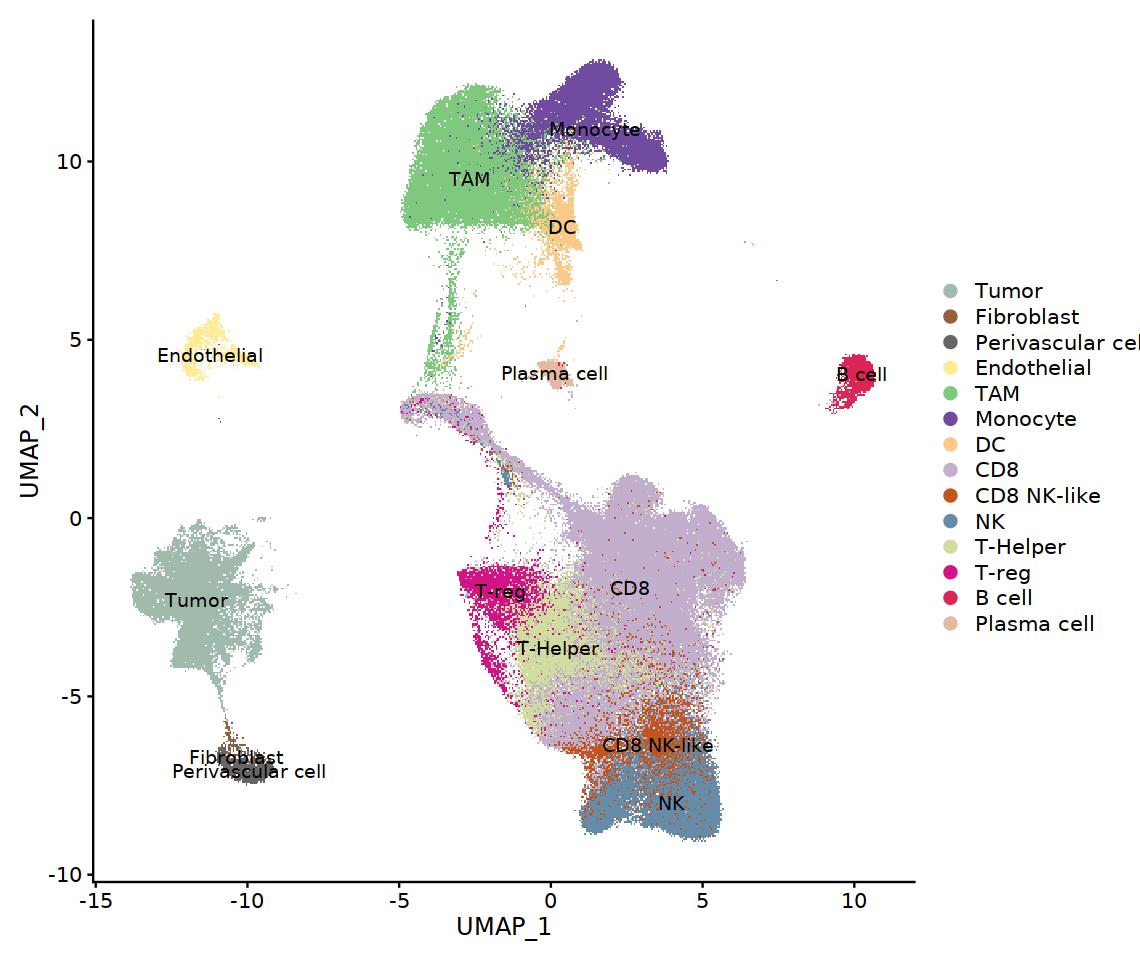

In [3]:
options(repr.plot.width=9.5, repr.plot.height=8)

goi = readRDS("../../Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)

goi

##

celltype_cols = readRDS(file = "../../Data_Objects/celltype_cols.RDS")
celltype_cols

##

seur_full = readRDS("../../Data_Objects/seur_full_BBK_Manuscript.RDS")
table(seur_full$IO_Treated)

Idents(seur_full) = "BBK_Broad_Celltype"

seur_full = subset(seur_full, idents = c("Contam","Omitted"), invert = T)

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
Idents(seur_full) = "BBK_Broad_Celltype"
table(Idents(seur_full))

DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



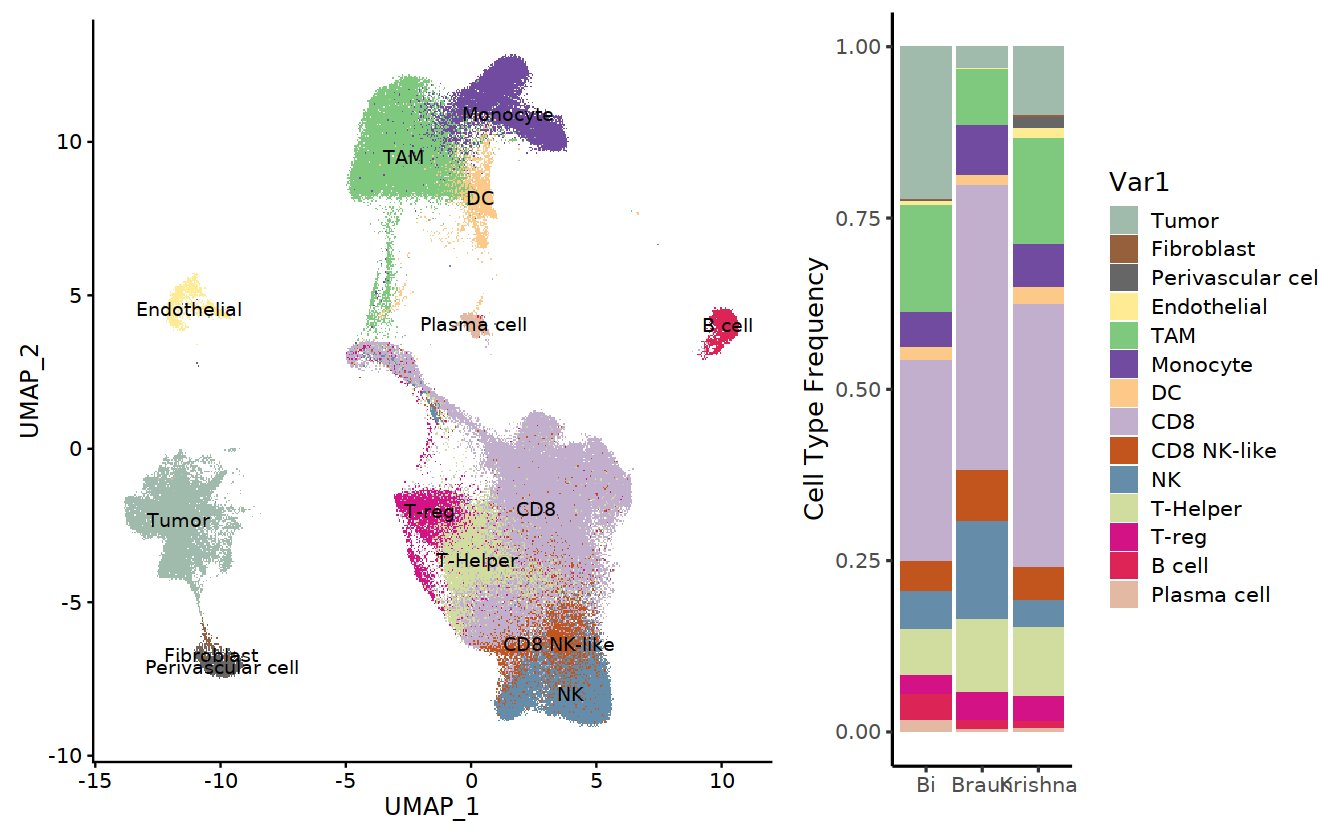

In [4]:
options(repr.plot.width=11, repr.plot.height=7)

celltype_umap = DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F) + NoLegend()

props <- prop.table(table(Idents(seur_full),seur_full$Cohort), margin = 2)
props <- data.frame(props)
celltype_props = ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") + 
scale_fill_manual(values = celltype_cols[levels(Idents(seur_full))]) + theme_classic(base_size = 15) +
xlab(label = "") + ylab(label = "Cell Type Frequency")

plot_grid(celltype_umap, celltype_props,ncol = 2, rel_widths = c(1.5, 1))

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1A_UMAP_PropBar_CellType.pdf", width = 11, height = 7)

### Supp Figure 1A. UMAP of integrated dataset colored by cohort, stage, biopsy site, IO exposure status <a name="1"></a>

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



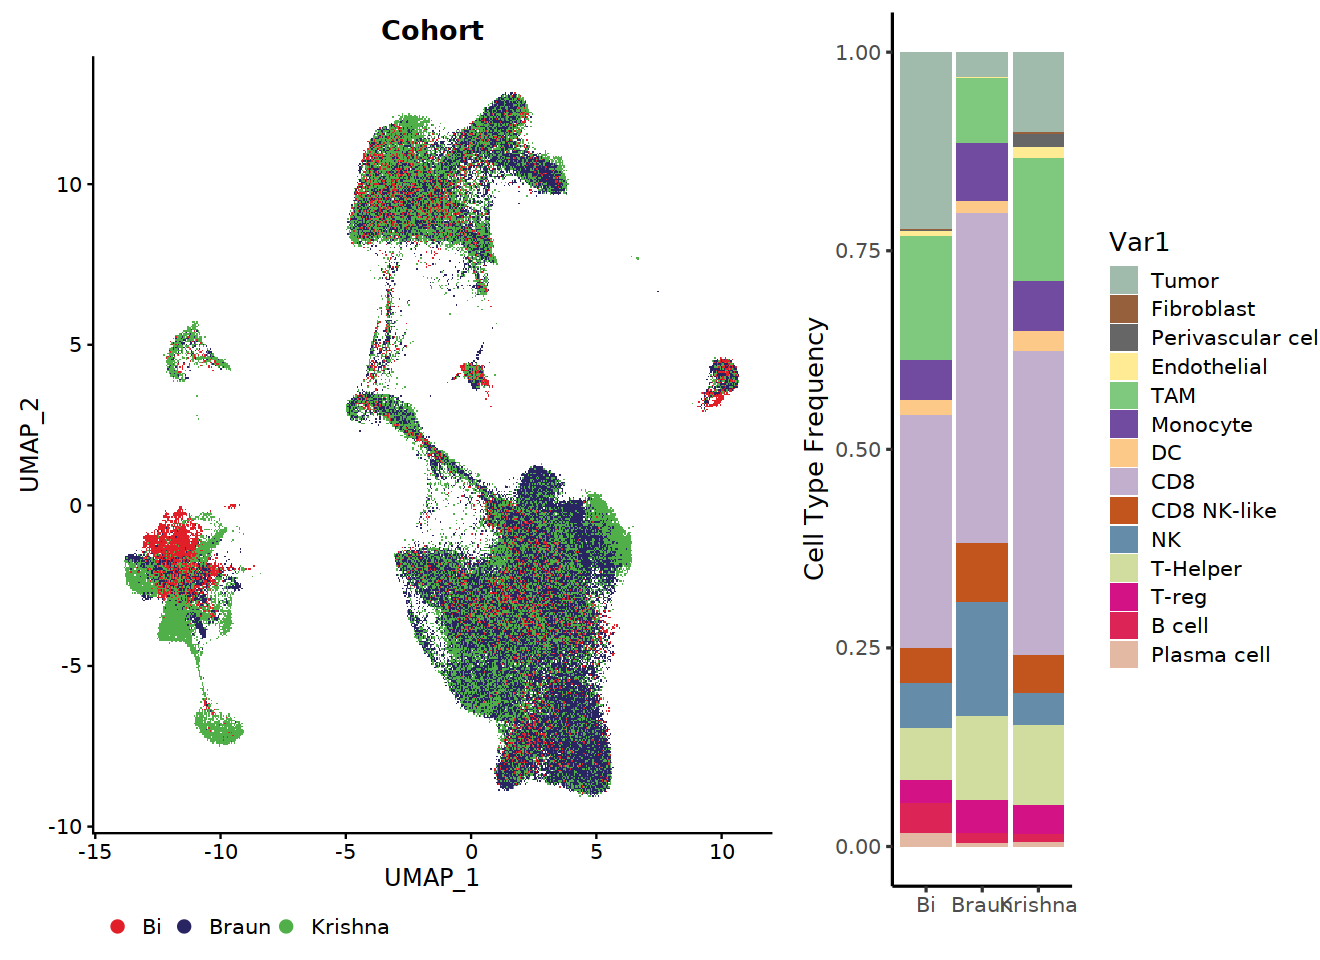

In [10]:
options(repr.plot.width=11, repr.plot.height=8)

Cohort_umap = DimPlot(seur_full, label = F, cols = c("#E11F28","#292562","#50AF48"), shuffle = T, group.by = "Cohort") +
theme(legend.position = "bottom")

props <- prop.table(table(Idents(seur_full),seur_full$Cohort), margin = 2)
props <- data.frame(props)
Cohort_props = ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") + 
scale_fill_manual(values = celltype_cols[levels(Idents(seur_full))]) + theme_classic(base_size = 15) +
xlab(label = "") + ylab(label = "Cell Type Frequency")

plot_grid(Cohort_umap, Cohort_props,ncol = 2, rel_widths = c(1.5, 1))

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1A_UMAP_PropBar_Cohort.pdf", width = 11, height = 8)

In [11]:
table(subset(seur_full@meta.data, Cohort == "Bi")$BBK_Broad_Celltype)

table(subset(seur_full@meta.data, Cohort == "Braun")$BBK_Broad_Celltype)

table(subset(seur_full@meta.data, Cohort == "Krishna")$BBK_Broad_Celltype)


            Tumor        Fibroblast Perivascular cell       Endothelial 
             5939                40                30               160 
              TAM          Monocyte                DC               CD8 
             4145              1347               499              7805 
      CD8 NK-like                NK          T-Helper             T-reg 
             1157              1497              1760               742 
           B cell       Plasma cell 
             1019               436 


            Tumor        Fibroblast Perivascular cell       Endothelial 
             3274                11                10               226 
              TAM          Monocyte                DC               CD8 
             8561              7647              1537             43439 
      CD8 NK-like                NK          T-Helper             T-reg 
             7809             15012             11107              4355 
           B cell       Plasma cell 
             1366               340 


            Tumor        Fibroblast Perivascular cell       Endothelial 
             9781               226              1651              1395 
              TAM          Monocyte                DC               CD8 
            14978              6078              2486             37213 
      CD8 NK-like                NK          T-Helper             T-reg 
             4597              3913              9789              3521 
           B cell       Plasma cell 
              945               528 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




     I     II    III     IV 
 40998   6858  66051 114464 

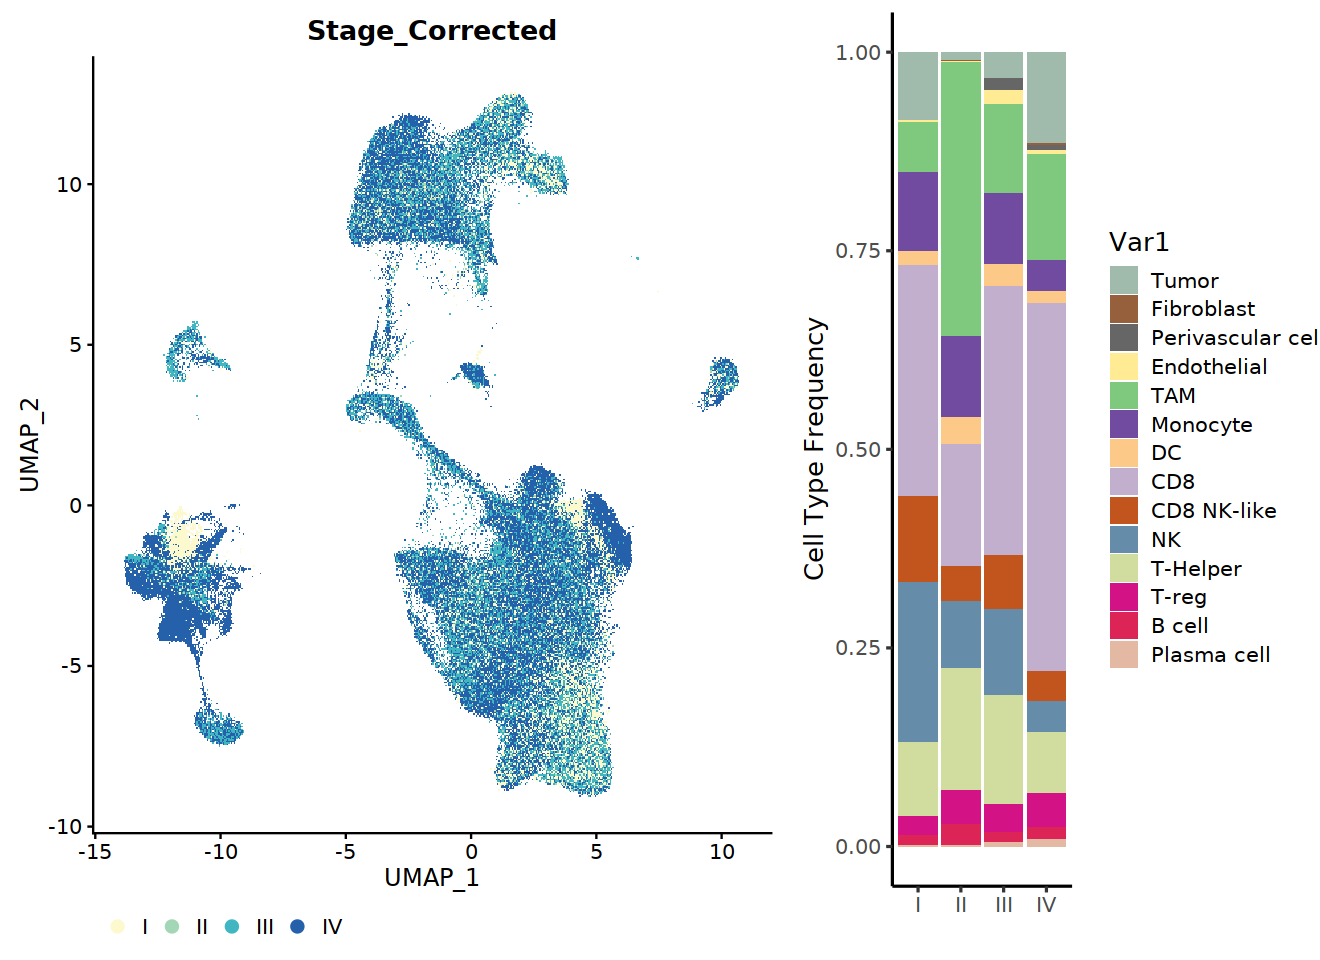

In [12]:
options(repr.plot.width=11, repr.plot.height=8)

Stage_Corrected_umap = DimPlot(seur_full, label = F, cols = c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"), shuffle = T, group.by = "Stage_Corrected") +
theme(legend.position = "bottom")

props <- prop.table(table(Idents(seur_full),seur_full$Stage_Corrected), margin = 2)
props <- data.frame(props)
Stage_Corrected_props = ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") + 
scale_fill_manual(values = celltype_cols[levels(Idents(seur_full))]) + theme_classic(base_size = 15) +
xlab(label = "") + ylab(label = "Cell Type Frequency")

plot_grid(Stage_Corrected_umap, Stage_Corrected_props,ncol = 2, rel_widths = c(1.5, 1))

table(seur_full$Stage_Corrected)

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1A_UMAP_PropBar_Stage_Corrected.pdf", width = 11, height = 8)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



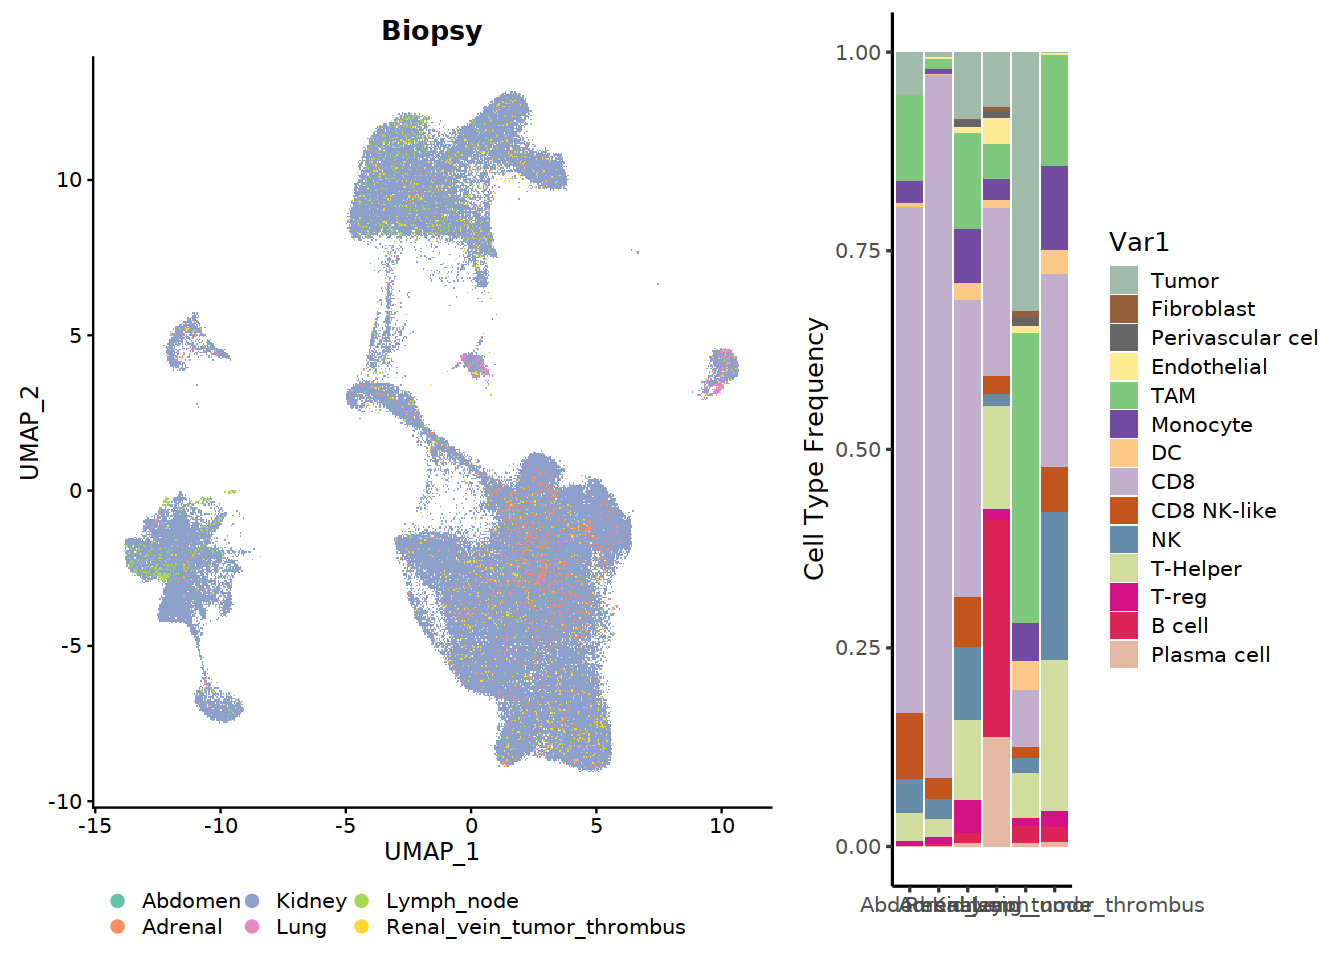

In [13]:
options(repr.plot.width=11, repr.plot.height=8)

Biopsy_umap = DimPlot(seur_full, label = F, cols = brewer.pal(6, "Set2"), shuffle = T, group.by = "Biopsy") +
theme(legend.position = "bottom")

props <- prop.table(table(Idents(seur_full),seur_full$Biopsy), margin = 2)
props <- data.frame(props)
Biopsy_props = ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") + 
scale_fill_manual(values = celltype_cols[levels(Idents(seur_full))]) + theme_classic(base_size = 15) +
xlab(label = "") + ylab(label = "Cell Type Frequency")

plot_grid(Biopsy_umap, Biopsy_props,ncol = 2, rel_widths = c(1.5, 1))

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1A_UMAP_PropBar_Biopsy.pdf", width = 11, height = 8)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




IO Exposed   IO Naive 
     84990     143381 

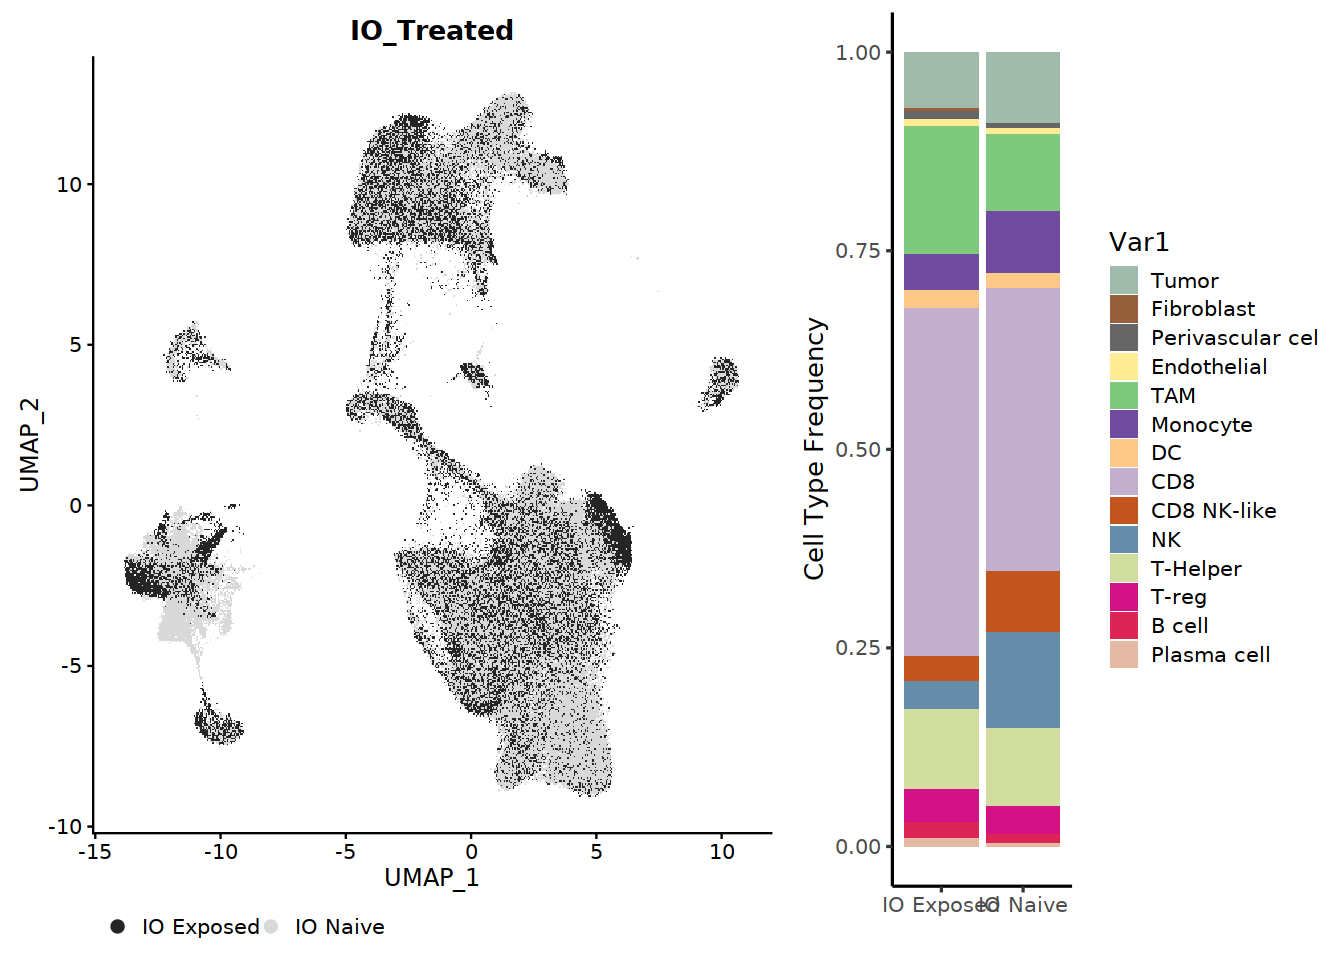

In [14]:
options(repr.plot.width=11, repr.plot.height=8)

IO_Treated_umap = DimPlot(seur_full, label = F, cols = c("#252525","#d9d9d9"), shuffle = T, group.by = "IO_Treated") +
theme(legend.position = "bottom")

props <- prop.table(table(Idents(seur_full),seur_full$IO_Treated), margin = 2)
props <- data.frame(props)
IO_Treated_props = ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") + 
scale_fill_manual(values = celltype_cols[levels(Idents(seur_full))]) + theme_classic(base_size = 15) +
xlab(label = "") + ylab(label = "Cell Type Frequency")

plot_grid(IO_Treated_umap, IO_Treated_props,ncol = 2, rel_widths = c(1.5, 1))

table(seur_full$IO_Treated)

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1A_UMAP_PropBar_IO_Treated.pdf", width = 11, height = 8)

### Supp Figure 1B. Dotplot of DE marker genes between broad cell types <a name="2"></a>

### DEG between all cell types

### Rscripts/Supp_Fig1B_DEG.R

In [ ]:
library(Seurat)
library(useful)
library(dplyr)

setwd("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024")

Vargenes = readRDS("Signatures/manuscript_all_broadcelltype_var2000_seur_full.RDS")
length(Vargenes)
length(unique(Vargenes))

seur_full = readRDS("Data_Objects/seur_full_BBK_Manuscript.RDS")
Idents(seur_full) = "BBK_Broad_Celltype"
seur_full = subset(seur_full, idents = c("Omitted","Contam"), invert = T)

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

Idents(seur_full) = "BBK_Broad_Celltype"

table(Idents(seur_full))

seur_full.small = subset(seur_full, cells = colnames(subset(seur_full, downsample = 2000)))

markers = FindAllMarkers(seur_full.small, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25,verbose = T, assay = "RNA",test.use = "LR",features = Vargenes,latent.vars = c("Patient","Stage_Corrected_EarlyLate"))

saveRDS(markers, file = "Supp_Figures/Supp_Figure1_2/Supp_Figure1B_seur_full_2000downsample_DE.RDS")

### Read in DE results

In [15]:
markers = readRDS("../../Supp_Figures/Supp_Figure1_2/Supp_Figure1B_seur_full_2000downsample_DE.RDS")

In [16]:
unique(markers$cluster)

[1] Tumor             Fibroblast        Perivascular cell Endothelial      
 [5] TAM               Monocyte          DC                CD8              
 [9] CD8 NK-like       NK                T-Helper          T-reg            
[13] B cell            Plasma cell      
14 Levels: Tumor Fibroblast Perivascular cell Endothelial TAM Monocyte ... Plasma cell

In [17]:
subset(markers, cluster == "Plasma cell" & p_val_adj < 0.01)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGKC,0.000000e+00,8.8728432,0.815,0.055,0.000000e+00,Plasma cell,IGKC
IGHA1,0.000000e+00,8.2452450,0.646,0.028,0.000000e+00,Plasma cell,IGHA1
IGLC2,0.000000e+00,7.8716074,0.447,0.006,0.000000e+00,Plasma cell,IGLC2
JCHAIN,0.000000e+00,7.3122446,0.923,0.017,0.000000e+00,Plasma cell,JCHAIN
IGHG1,0.000000e+00,7.3018409,0.703,0.007,0.000000e+00,Plasma cell,IGHG1
IGHG3,0.000000e+00,7.2936246,0.695,0.006,0.000000e+00,Plasma cell,IGHG3
IGLV3-1,0.000000e+00,6.2519005,0.504,0.004,0.000000e+00,Plasma cell,IGLV3-1
IGHG2,0.000000e+00,5.5273570,0.554,0.012,0.000000e+00,Plasma cell,IGHG2
MZB1,0.000000e+00,4.7013410,0.975,0.027,0.000000e+00,Plasma cell,MZB1


In [18]:
markers_list = c("CA9","CRYAB","DCN","LUM","PDGFRB","RGS5","VWF","C1QC","TREM2","S100A8","FCN1","FCER1A","CD8A","GZMK","NKG7","GNLY","KLRD1","KLRB1","CD40LG","IL7R","FOXP3","CD79A","IGKC")

### Markers in rows

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



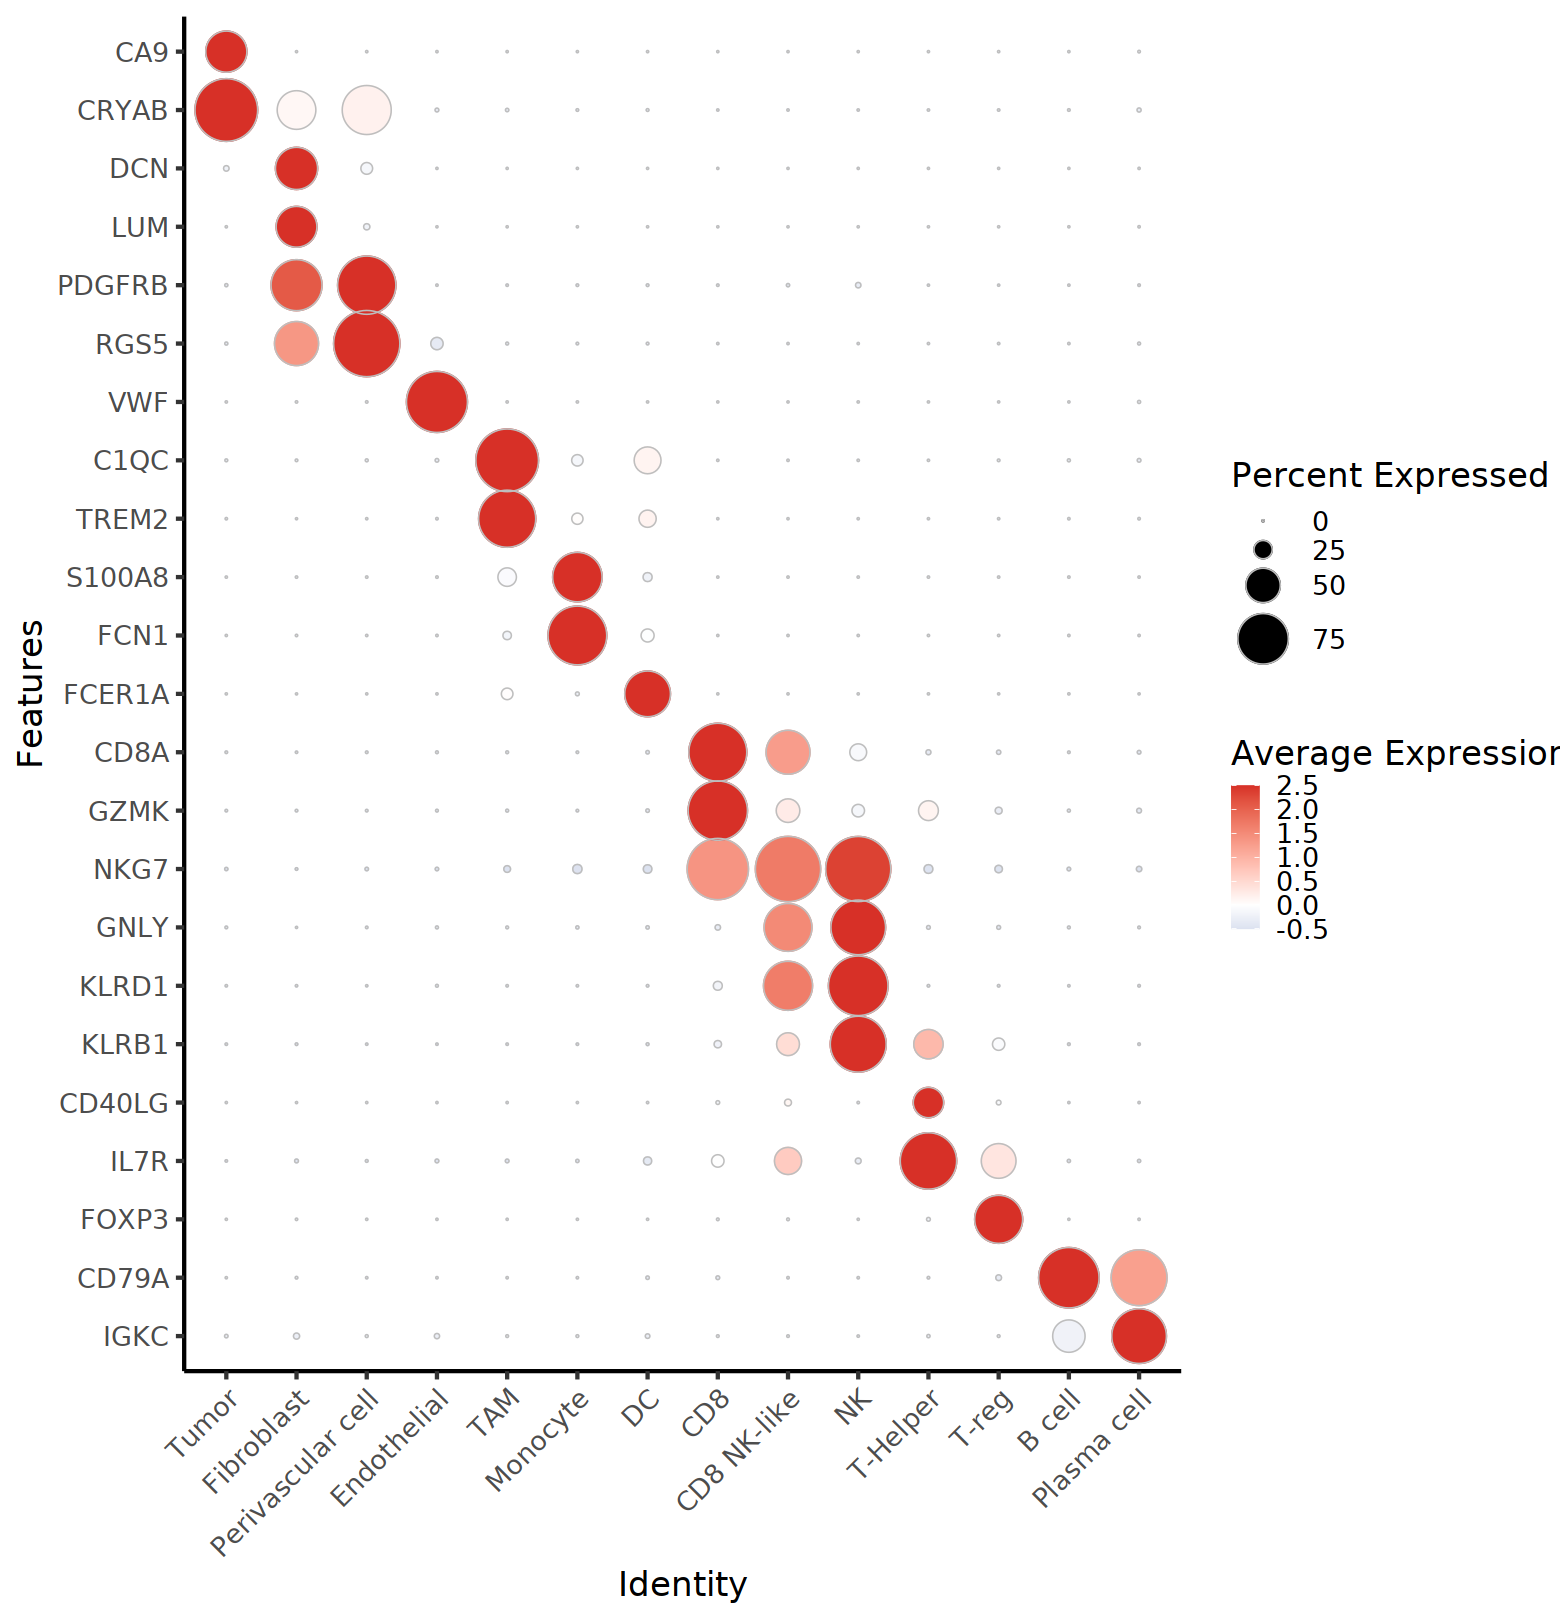

In [29]:
options(repr.plot.width=13, repr.plot.height=13.5)

DotPlot(seur_full, features = rev(markers_list),group.by = "BBK_Broad_Celltype",assay = "RNA",dot.scale = 18, cols = c("white","red")) + theme_classic(base_size = 20) +
geom_point(aes(size = pct.exp),shape = 21, color = "grey",stroke = 0.5) + 
scale_colour_gradient2(low = "#4575b4", mid = "white", high = "#d73027") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + coord_flip()

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1B_Markers_Dotplot_Vert.pdf", width = 13, height = 13.5)

### Markers in columns

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



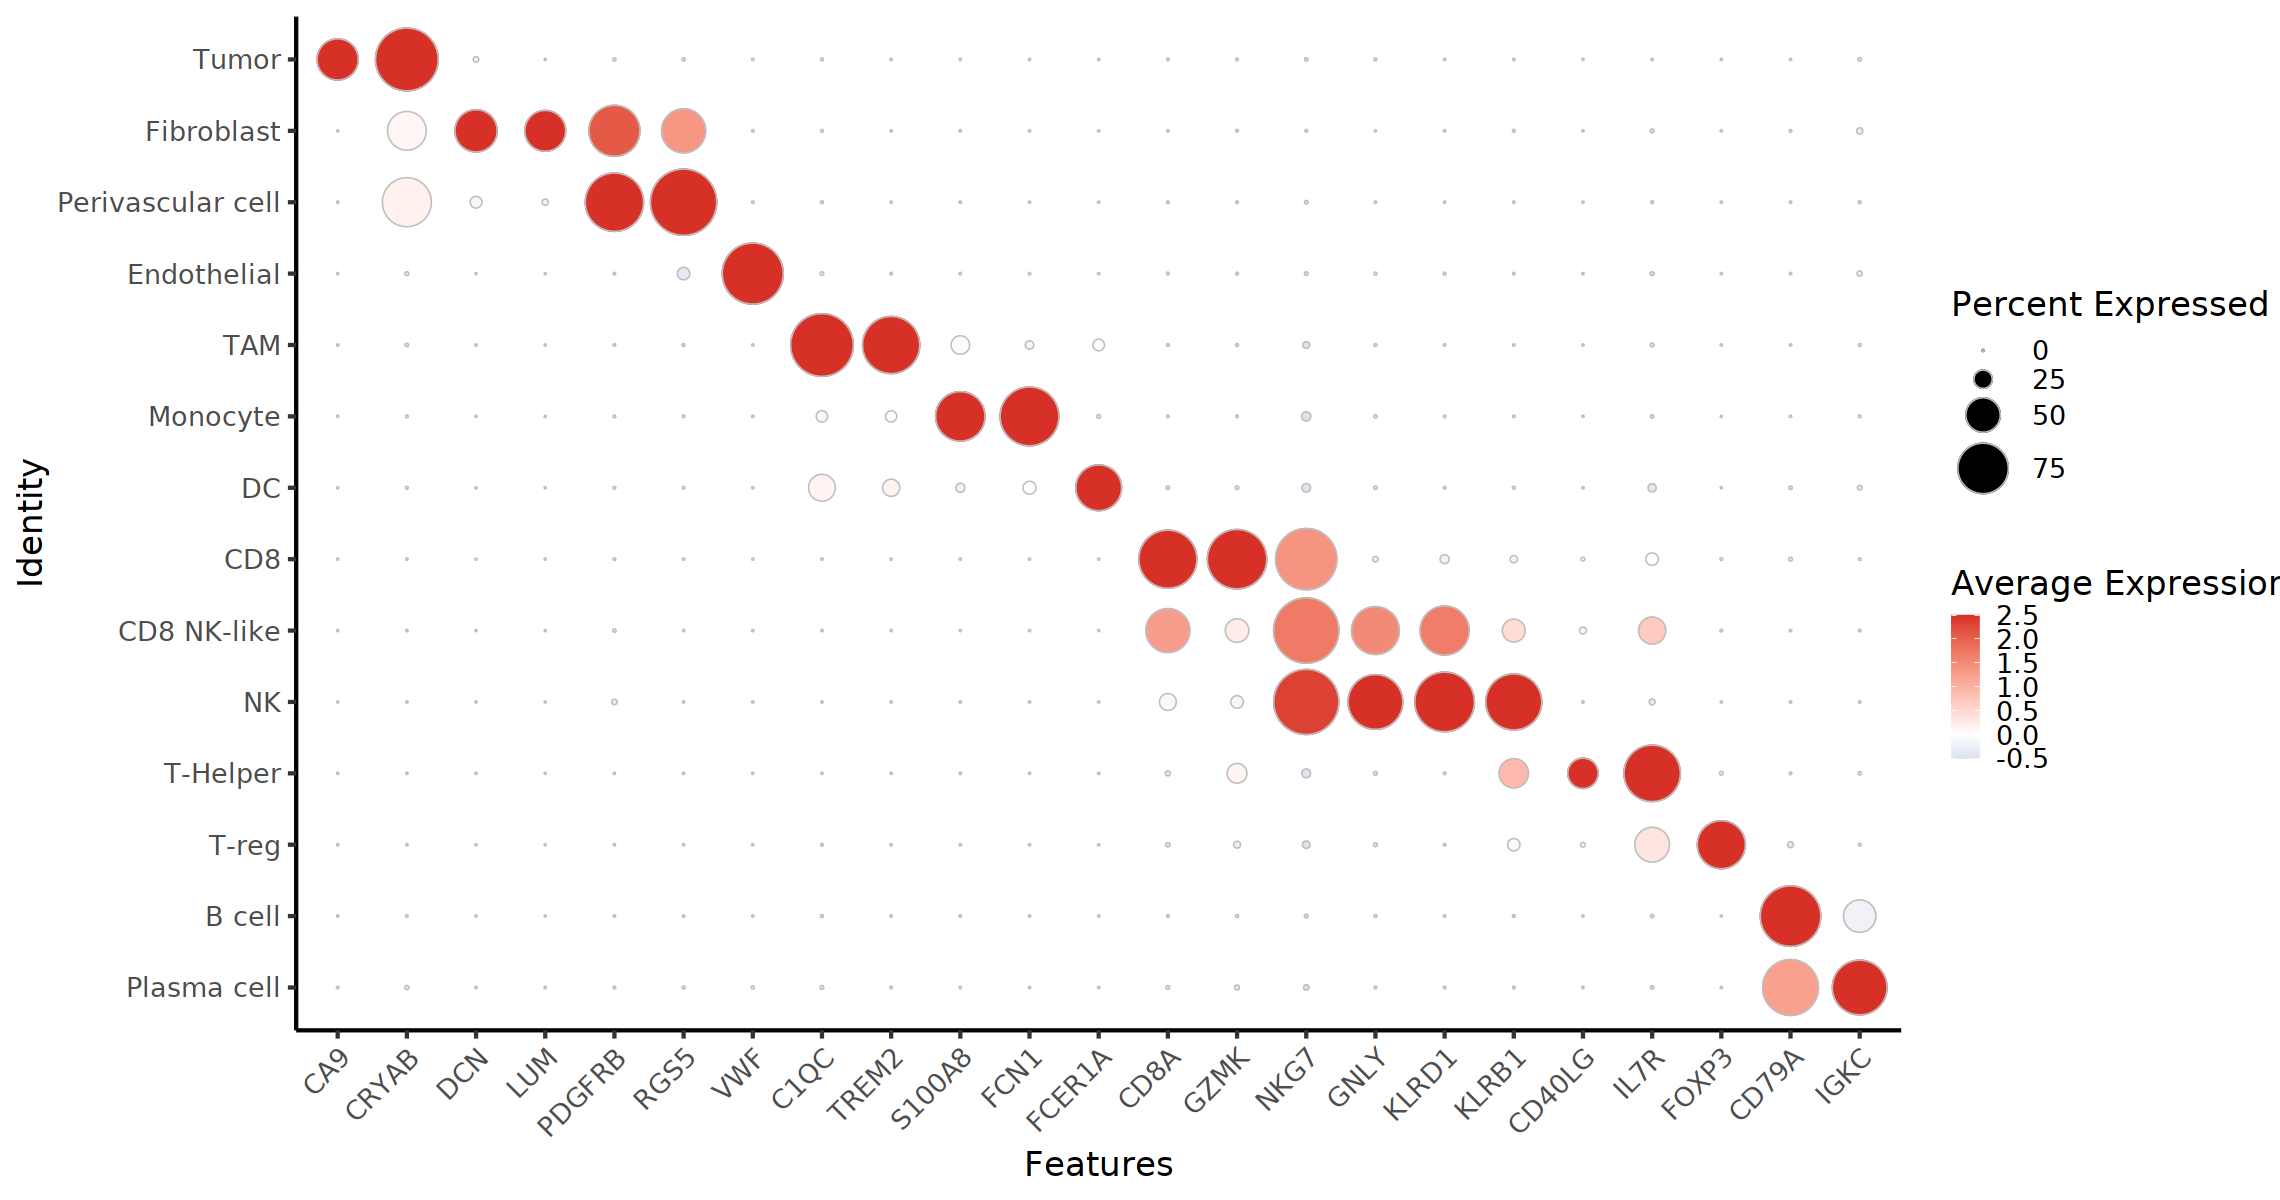

In [30]:
options(repr.plot.width=19, repr.plot.height=10)

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = rev(c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell")))

DotPlot(seur_full, features = markers_list,group.by = "BBK_Broad_Celltype",assay = "RNA",dot.scale = 18, cols = c("white","red")) + theme_classic(base_size = 20) +
geom_point(aes(size = pct.exp),shape = 21, color = "grey",stroke = 0.5) + 
scale_colour_gradient2(low = "#4575b4", mid = "white", high = "#d73027") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS1B_Markers_Dotplot_Horiz.pdf", width = 19, height = 10)

### Supp Figure 2A-B. Heatmap of ISG.RS and IFNG.GS genes across broad cell types <a name="3"></a>

### Read in signature scores

In [21]:
res = data.frame(readRDS("../../Figures/Figure1/seur_full_isg.rs_ifng.gs_scores_hacksig_zscore.RDS"))
row.names(res) = res$sample_id
corner(res)

,sample_id,Minn_Benci_ISG.RS,Minn_Benci_IFNG.GS
,<chr>,<dbl>,<dbl>
GTTCTCGAGAGGTAGA-1.5pool1_2,GTTCTCGAGAGGTAGA-1.5pool1_2,0.03554675,1.52951884
CTAGAGTCATCAGTCA-1.5pool1_2,CTAGAGTCATCAGTCA-1.5pool1_2,0.63826751,0.66786794
CGGCTAGAGGTAGCCA-1.5pool1_2,CGGCTAGAGGTAGCCA-1.5pool1_2,-0.60394903,0.02734308
CTGCTGTAGTGTTTGC-1.5pool1_2,CTGCTGTAGTGTTTGC-1.5pool1_2,0.18163262,1.98420733
CCATGTCCATCGATGT-1.5pool1_2,CCATGTCCATCGATGT-1.5pool1_2,0.79286452,0.75634495


In [22]:
setequal(row.names(res),row.names(seur_full@meta.data))

[1] TRUE

In [23]:
seur_full@meta.data = cbind(seur_full@meta.data,res)

### Read in signature genes

In [24]:
benci = readRDS("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Signatures//Benci_Minn_ISG_Signatures.RDS")
benci$Minn_Benci_ISG.RS
benci$Minn_Benci_IFNG.GS

[1] "IFI27"    "IRF7"     "USP18"    "BST2"     "CXCL10"   "DDX60"   
 [7] "HERC6"    "HLA-B"    "HLA-G"    "IFI35"    "IFI44"    "IFI44L"  
[13] "IFIT1"    "IFIT3"    "ISG15"    "LGALS3BP" "LY6E"     "MX1"     
[19] "MX2"      "OAS3"     "OASL"     "PLSCR1"   "STAT1"    "TRIM14"  
[25] "HSD17B1"  "OAS1"     "CA2"      "CCNA1"    "CXCL1"    "GALC"    
[31] "IFI6"     "IFITM1"   "LAMP3"    "MCL1"     "ROBO1"    "SLC6A15" 
[37] "THBS1"    "TIMP3"

[1] "TNFSF10"  "IRF9"     "PSMB9"    "EPSTI1"   "PARP12"   "TRIM25"  
  [7] "LAP3"     "CASP7"    "UPP1"     "B2M"      "IRF4"     "SRI"     
 [13] "NFKBIA"   "IFIT2"    "OAS2"     "TAP1"     "EIF2AK2"  "RSAD2"   
 [19] "IRF1"     "XAF1"     "SP110"    "PSMB8"    "IFITM3"   "GBP4"    
 [25] "IRF8"     "PML"      "IFIH1"    "UBE2L6"   "ADAR"     "STAT2"   
 [31] "CXCL9"    "IL10RA"   "PLA2G4A"  "TRIM21"   "PTGS2"    "C1S"     
 [37] "DDX58"    "IL15"     "NLRC5"    "NMI"      "IDO1"     "PSMB10"  
 [43] "CXCL11"   "ITGB7"    "SAMHD1"   "CMPK2"    "SAMD9L"   "RTP4"    
 [49] "PTPN2"    "PARP14"   "TNFAIP2"  "IFITM2"   "SOCS1"    "CASP1"   
 [55] "ICAM1"    "WARS"     "PSME1"    "ISG20"    "IRF2"     "FCGR1A"  
 [61] "MARCH1"   "SOCS3"    "JAK2"     "HLA-DMA"  "TNFAIP6"  "TRIM26"  
 [67] "VCAM1"    "CD274"    "CIITA"    "NAMPT"    "SELP"     "GPR18"   
 [73] "FPR1"     "PRIC285"  "PSME2"    "SERPING1" "CCL5"     "RNF31"   
 [79] "SOD2"     "PSMA3"    "RNF213"   "PELI1"    "CFB"      "CD86"    
 [85] "TXNIP"    "HLA-DQA1" "GCH1"     "PNP"      "CCL7"     "PTPN6"   
 [91] "SPPL2A"   "IL4R"     "PNPT1"    "DHX58"    "BTG1"     "CASP8"   
 [97] "IFI30"    "CCL2"     "FGL2"     "SECTM1"   "IL15RA"   "CD40"    
[103] "TRAFD1"   "HLA-DRB1" "GBP6"     "LCP2"     "MT2A"     "RIPK1"   
[109] "KLRK1"    "PSMB2"    "TDRD7"    "HIF1A"    "EIF4E3"   "VAMP8"   
[115] "PFKP"     "CD38"     "ZBP1"     "BANK1"    "TOR1B"    "RBCK1"   
[121] "PDE4B"    "MVP"      "IL7"      "BPGM"     "FTSJD2"   "AUTS2"   
[127] "RIPK2"    "CD69"     "MYD88"    "PSMA2"    "PIM1"     "NOD1"    
[133] "CFH"      "TAPBP"    "SLC25A28" "PTPN1"    "TNFAIP3"  "SSPN"    
[139] "NUP93"    "MTHFD2"   "CDKN1A"   "NFKB1"    "BATF2"    "LATS2"   
[145] "IRF5"     "SLAMF7"   "ISOC1"    "P2RY14"   "STAT3"    "NCOA3"   
[151] "HLA-A"    "IL6"      "GZMA"     "IFNAR2"   "CD74"     "RAPGEF6" 
[157] "CASP4"    "FAS"      "OGFR"     "ARL4A"    "LYSMD2"   "CSF2RB"  
[163] "ST3GAL5"  "C1R"      "CASP3"    "CMKLR1"   "METTL7B"  "ST8SIA4" 
[169] "XCL1"     "IL2RB"    "VAMP5"    "IL18BP"   "ZNFX1"    "ARID5B"  
[175] "APOL6"    "STAT4"

### Order ISG.RS and IFNG.GS genes by their correlation with the corresponding signature score

In [25]:
RS = intersect(benci$Minn_Benci_ISG.RS,row.names(seur_full))
GS = intersect(benci$Minn_Benci_IFNG.GS,row.names(seur_full))

data_RS = seur_full@assays$RNA@data[RS,]
data_GS = seur_full@assays$RNA@data[GS,]

setequal(colnames(data_RS), row.names(seur_full@meta.data))
setequal(colnames(data_GS), row.names(seur_full@meta.data))

RS_cor = apply(data_RS, 1, cor, y = as.numeric(seur_full$Minn_Benci_ISG.RS))
GS_cor = apply(data_GS, 1, cor, y = as.numeric(seur_full$Minn_Benci_ISG.RS))

RS_cor = RS_cor[order(RS_cor, decreasing = T)]
GS_cor = GS_cor[order(GS_cor, decreasing = T)]

[1] TRUE

[1] TRUE

In [26]:
head(RS_cor)
head(GS_cor)

IFI6     IFIT3     IFIT1       MX1    IFI44L     ISG15 
0.5414076 0.5396357 0.5381815 0.5307218 0.4997573 0.4863463

IFITM3     RSAD2     IFIT2  SERPING1    EPSTI1      XAF1 
0.4132734 0.3948535 0.3697528 0.3076285 0.3054225 0.2929756

### Read in cluster.averages object

In [27]:
cluster.averages = readRDS(file = "../../Data_Objects/cluster.averages_seur_full.RDS")
head(cluster.averages@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Sample,rownames,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy,IO,TKI,Treated,IO_Treated
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Tumor_5pool1_2,Tumor,10000,18069,5pool1_2,Tumor_5pool1_2,Braun,I,Early,Kidney,No,No,No,IO Naive
Tumor_Bi_0600855_T3,Tumor,10000,15019,Bi_0600855_T3,Tumor_Bi_0600855_T3,Bi,IV,Late,Abdomen,PR,Yes,Yes,IO Exposed
Tumor_Bi_0600906_T1,Tumor,10000,17420,Bi_0600906_T1,Tumor_Bi_0600906_T1,Bi,IV,Late,Lymph_node,PD,Yes,Yes,IO Exposed
Tumor_Bi_0600913_T1,Tumor,10000,17015,Bi_0600913_T1,Tumor_Bi_0600913_T1,Bi,IV,Late,Lung,SD,Yes,Yes,IO Exposed
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577,Bi_0600915_T1_TrueTumor,Tumor_Bi_0600915_T1_TrueTumor,Bi,III,Late,Kidney,PR,No,Yes,IO Exposed
Tumor_Bi_0600916_T1,Tumor,10000,3093,Bi_0600916_T1,Tumor_Bi_0600916_T1,Bi,IV,Late,Lymph_node,No,No,No,IO Naive


### ISG.RS heatmap

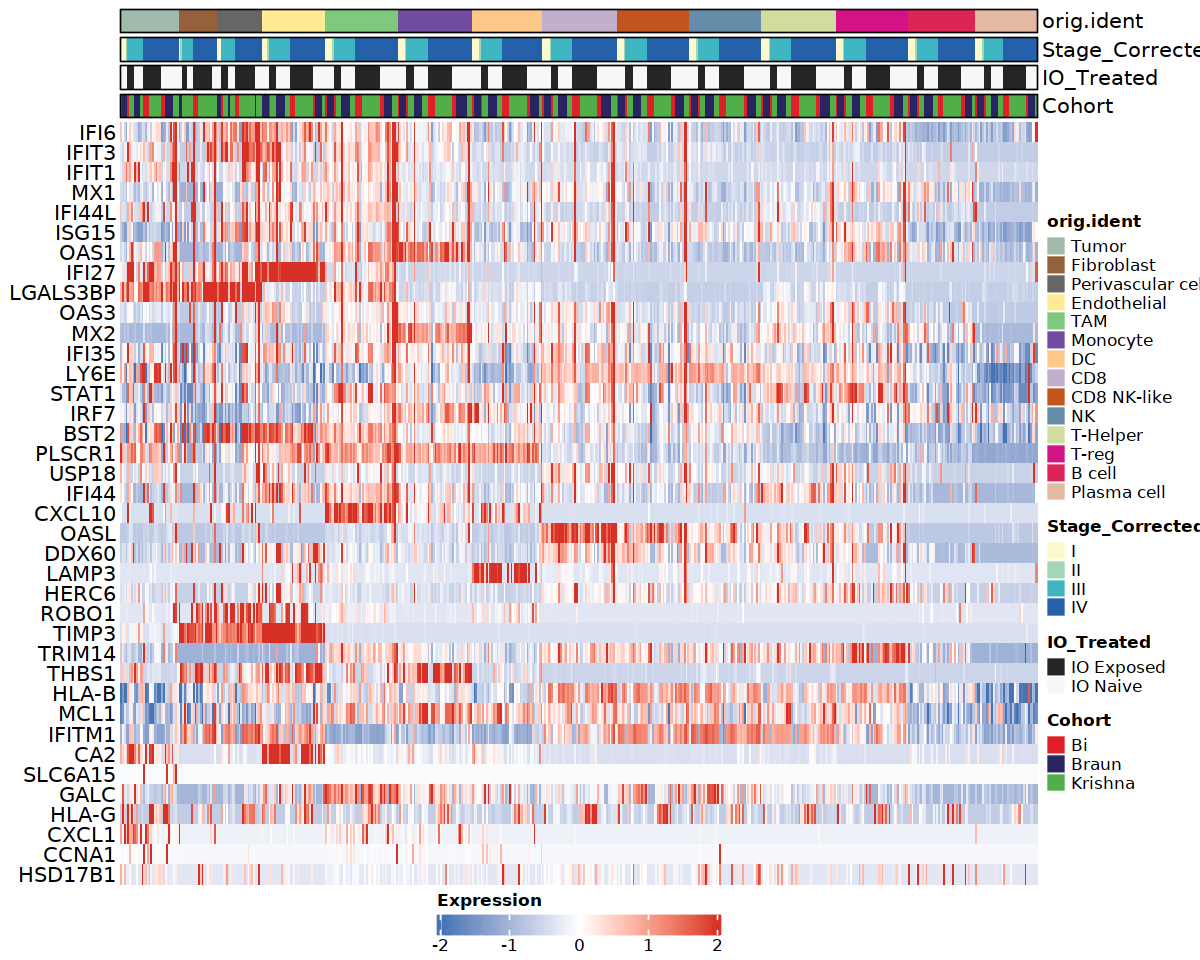

In [28]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=10, repr.plot.height=8)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = names(RS_cor),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

### Export

In [31]:
pdf("../../Supp_Figures_Final/Figure_S1_S2/FigureS2A_ISG.RS_Heatmap.pdf", width = 10, height = 8, useDingbats = F)

cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=10, repr.plot.height=8)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = names(RS_cor),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

dev.off()

pdf 
  2

### IFNG.GS heatmap

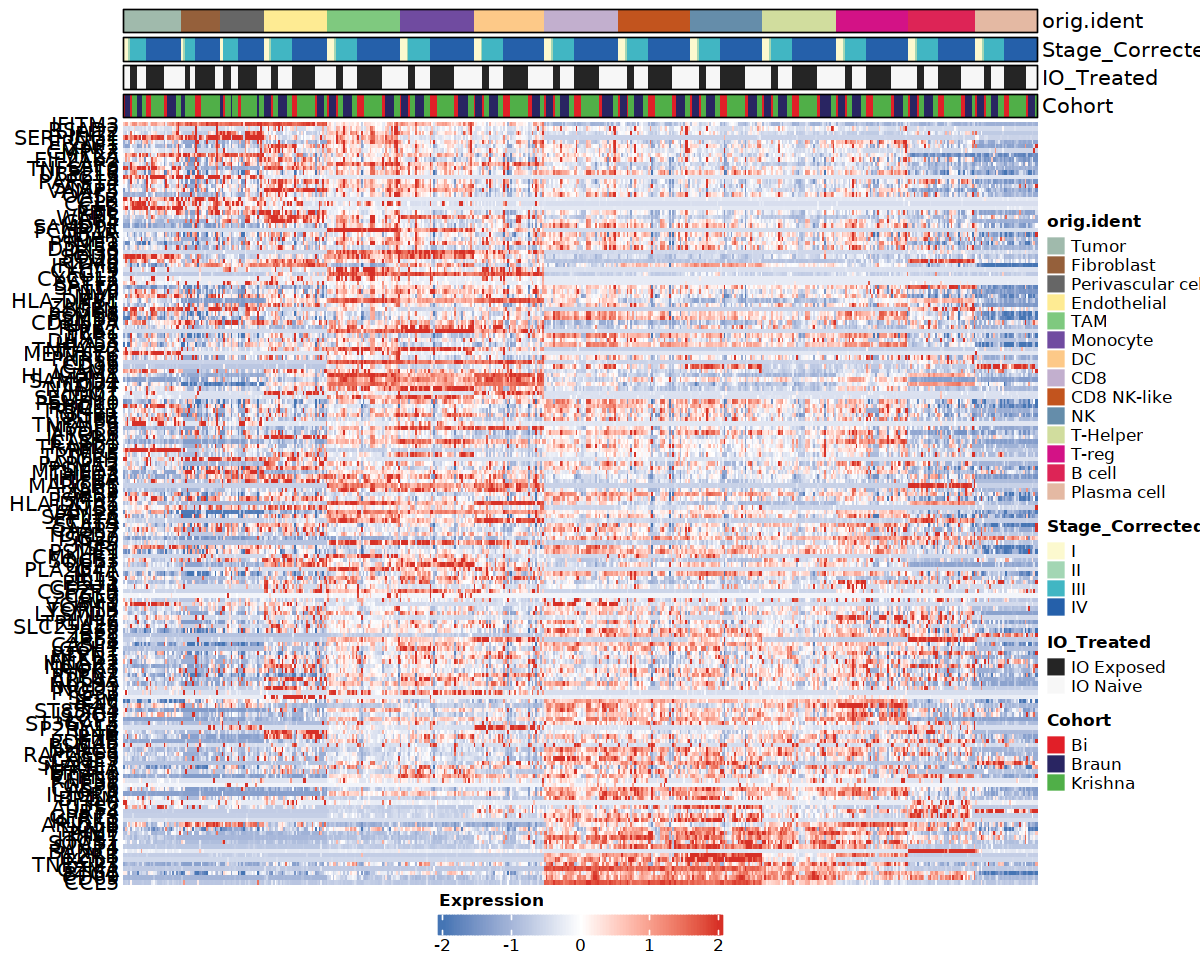

In [32]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=10, repr.plot.height=8)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = names(GS_cor),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

### Export

In [33]:
pdf("../../Supp_Figures_Final/Figure_S1_S2/FigureS2B_IFNG.GS_Heatmap.pdf", width = 10, height = 8, useDingbats = F)

cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=10, repr.plot.height=8)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = names(GS_cor),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

dev.off()

pdf 
  2

### Supp Figure 2C-F. Cox models for PFS and logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (IFNG.GS/ISG.RS) <a name="4"></a>

### Set panels for forest_model plots

In [34]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### Read in IMM151 data

In [35]:
clin_imm151_full = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_imm151_full)))
subset(df, Freq > 1)

clin_imm151_full = subset(clin_imm151_full, select = -c(IFIT3) )

,Var1,Freq
,<fct>,<int>
8604,IFIT3,2


### Read in JAV101 data

In [36]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )

,Var1,Freq
,<fct>,<int>
14682,CD8A,2
17979,Eosinophils,2
21236,IFIT3,2
27495,Neutrophils,2


### IMM151 Cox PH


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + 
    scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + 
    PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0921  -1.3709   0.7875   0.9084   1.2257  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                   0.31546    0.37351   0.845   0.3983  
scale(Minn_Benci_IFNG.GS)     0.03906    0.20135   0.194   0.8462  
scale(Minn_Benci_ISG.RS)     -0.06157    0.19280  -0.319   0.7495  
scale(AGE)                    0.18446    0.11492   1.605   0.1084  
SEXM                          0.13647    0.24340   0.561   0.5750  
MSKCC_RISK_SCOREIntermediate  0.15048    0.34934   0.431   0.6666  
MSKCC_RISK_SCORELow           1.17598    0.46380   2.536   0.0112 *
PDL1_IHCPDL1+                 0.27928    0.24655   1.133   0.2573  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

,GVIF,Df,GVIF^(1/(2*Df))
scale(Minn_Benci_IFNG.GS),3.184066,1,1.784395
scale(Minn_Benci_ISG.RS),2.970182,1,1.723422
scale(AGE),1.050255,1,1.024820
SEX,1.013102,1,1.006530
MSKCC_RISK_SCORE,1.033141,2,1.008184
PDL1_IHC,1.145872,1,1.070454


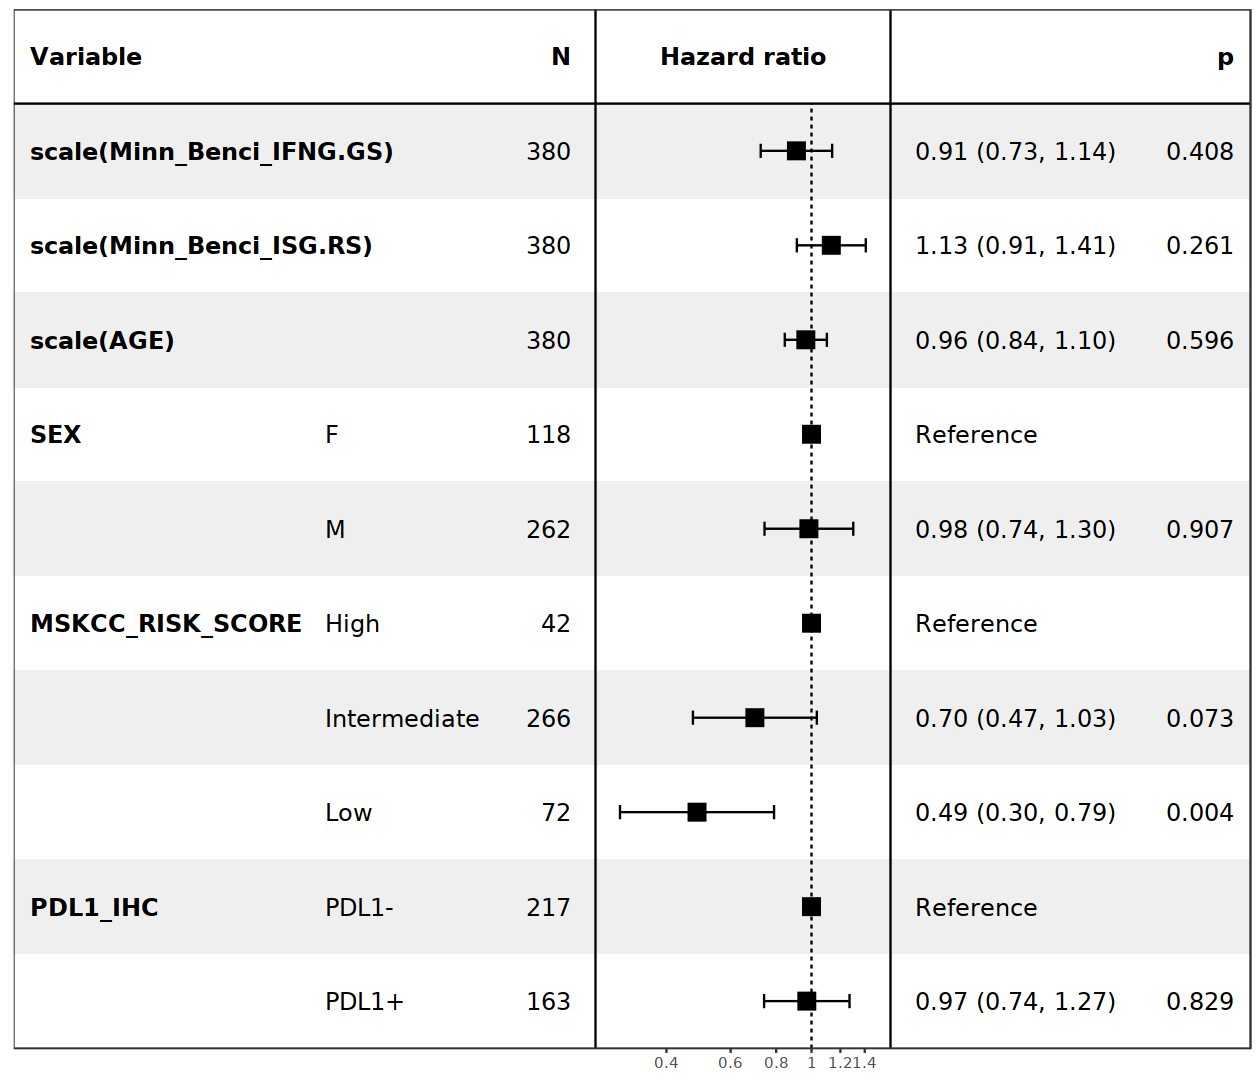

In [37]:
options(repr.plot.width=10.5, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
#forest_model(res.cox, panels,recalculate_width = F)

imm151_cox_plot = forest_model(res.cox, panels,recalculate_width = F)
imm151_cox_plot

### JAV101 Cox PH


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + 
    scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, 
    family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2102  -1.2100   0.6694   0.8030   1.5318  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.6808     0.4475  -1.521  0.12815    
scale(Minn_Benci_IFNG.GS)   0.4428     0.2798   1.583  0.11350    
scale(Minn_Benci_ISG.RS)   -0.3972     0.2736  -1.451  0.14664    
scale(Age)                  0.2201     0.1259   1.748  0.08040 .  
SexM                        0.1483     0.2884   0.514  0.60697    
MSKCCINTERMEDIATE           1.0549     0.3867   2.728  0.00637 ** 
MSKCCFAVORABLE              1.8556     0.4726   3.926 8.64e-05 ***
PDL1_status_v1Y             0.5599     0.2874   1.948  0.05137 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion

,GVIF,Df,GVIF^(1/(2*Df))
scale(Minn_Benci_IFNG.GS),5.050558,1,2.247345
scale(Minn_Benci_ISG.RS),4.809624,1,2.193085
scale(Age),1.011252,1,1.005610
Sex,1.024418,1,1.012135
MSKCC,1.040617,2,1.010003
PDL1_status_v1,1.153831,1,1.074165


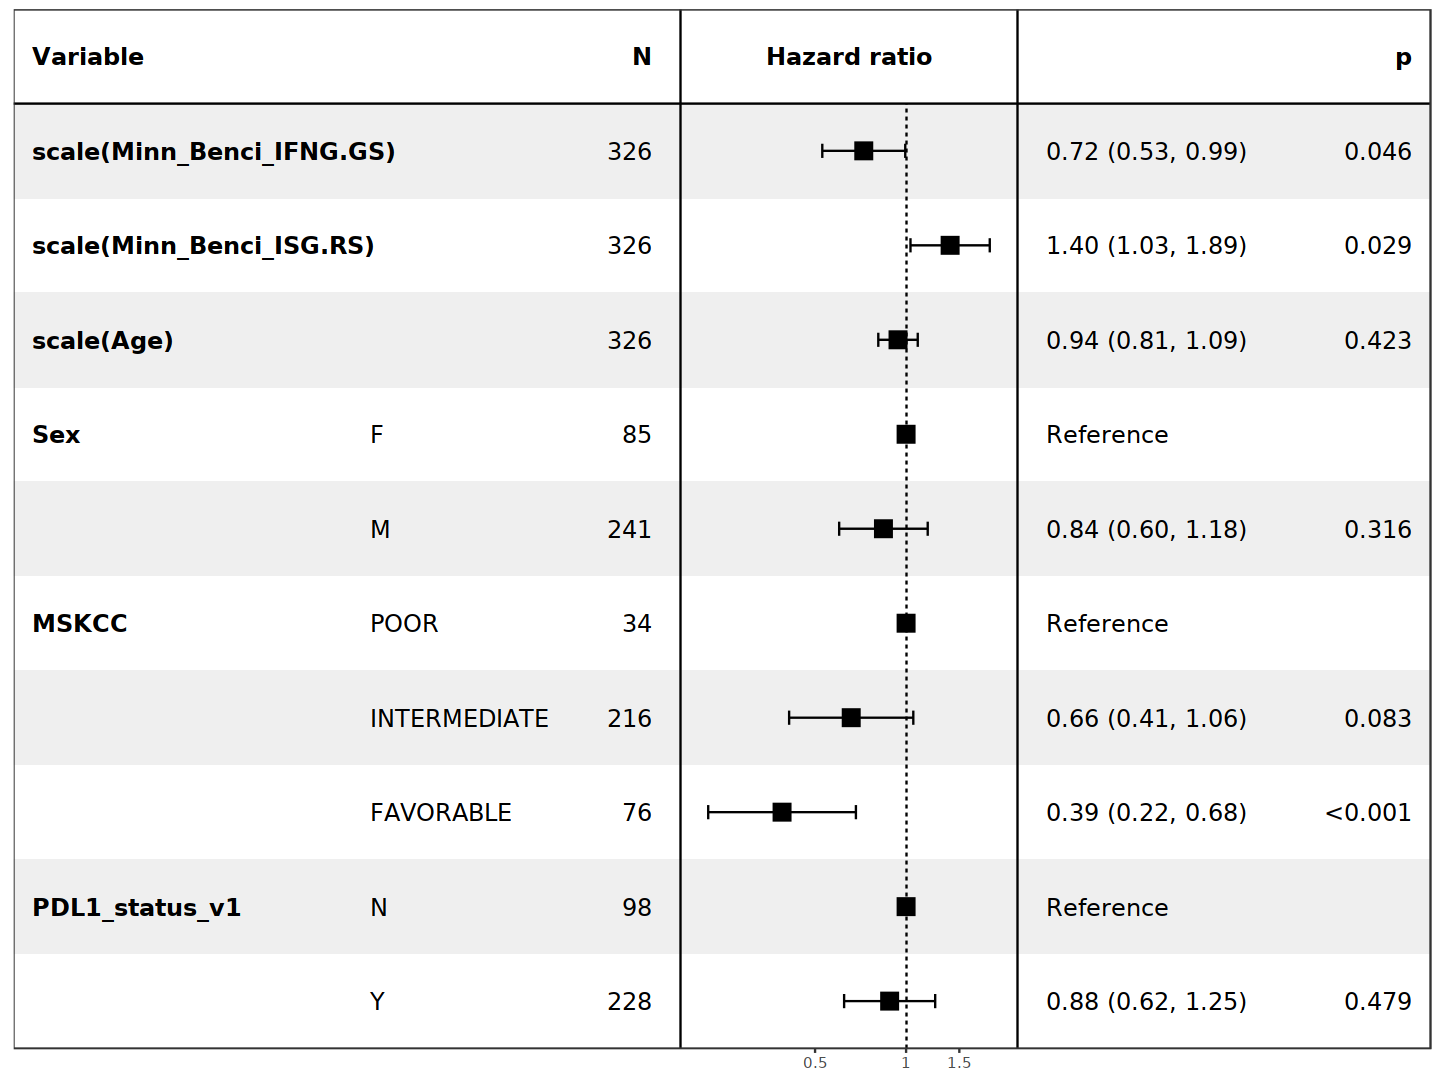

In [38]:
options(repr.plot.width=10.5, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

options(repr.plot.width=12, repr.plot.height=9)
res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
#forest_model(res.cox,panels,recalculate_width = F)

jav101_cox_plot = forest_model(res.cox,panels,recalculate_width = F)
jav101_cox_plot

### Set panels for odds ratio forest_model plots

In [39]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Odds ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151 LR for CB vs NCB


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + 
    scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + 
    PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0921  -1.3709   0.7875   0.9084   1.2257  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                   0.31546    0.37351   0.845   0.3983  
scale(Minn_Benci_IFNG.GS)     0.03906    0.20135   0.194   0.8462  
scale(Minn_Benci_ISG.RS)     -0.06157    0.19280  -0.319   0.7495  
scale(AGE)                    0.18446    0.11492   1.605   0.1084  
SEXM                          0.13647    0.24340   0.561   0.5750  
MSKCC_RISK_SCOREIntermediate  0.15048    0.34934   0.431   0.6666  
MSKCC_RISK_SCORELow           1.17598    0.46380   2.536   0.0112 *
PDL1_IHCPDL1+                 0.27928    0.24655   1.133   0.2573  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

,GVIF,Df,GVIF^(1/(2*Df))
scale(Minn_Benci_IFNG.GS),3.184066,1,1.784395
scale(Minn_Benci_ISG.RS),2.970182,1,1.723422
scale(AGE),1.050255,1,1.024820
SEX,1.013102,1,1.006530
MSKCC_RISK_SCORE,1.033141,2,1.008184
PDL1_IHC,1.145872,1,1.070454


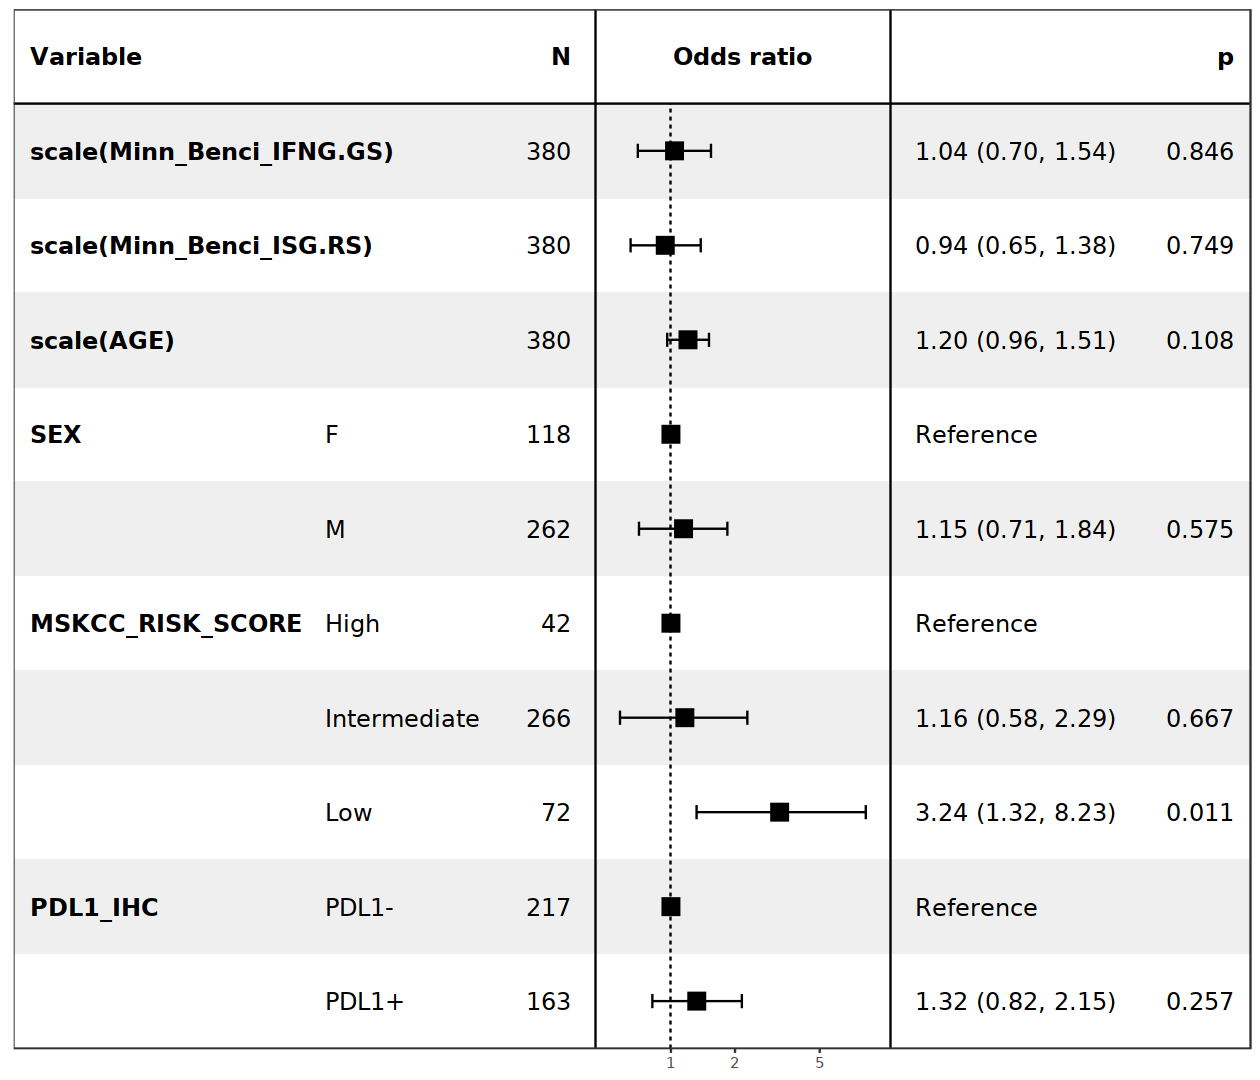

In [40]:
options(repr.plot.width=10.5, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
#forest_model(res.cox, panels,recalculate_width = F)

imm151_lr_plot = forest_model(mylogit, panels,recalculate_width = F)
imm151_lr_plot

### JAV101 LR for CB vs NCB


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + 
    scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, 
    family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2102  -1.2100   0.6694   0.8030   1.5318  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.6808     0.4475  -1.521  0.12815    
scale(Minn_Benci_IFNG.GS)   0.4428     0.2798   1.583  0.11350    
scale(Minn_Benci_ISG.RS)   -0.3972     0.2736  -1.451  0.14664    
scale(Age)                  0.2201     0.1259   1.748  0.08040 .  
SexM                        0.1483     0.2884   0.514  0.60697    
MSKCCINTERMEDIATE           1.0549     0.3867   2.728  0.00637 ** 
MSKCCFAVORABLE              1.8556     0.4726   3.926 8.64e-05 ***
PDL1_status_v1Y             0.5599     0.2874   1.948  0.05137 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion

,GVIF,Df,GVIF^(1/(2*Df))
scale(Minn_Benci_IFNG.GS),5.050558,1,2.247345
scale(Minn_Benci_ISG.RS),4.809624,1,2.193085
scale(Age),1.011252,1,1.005610
Sex,1.024418,1,1.012135
MSKCC,1.040617,2,1.010003
PDL1_status_v1,1.153831,1,1.074165


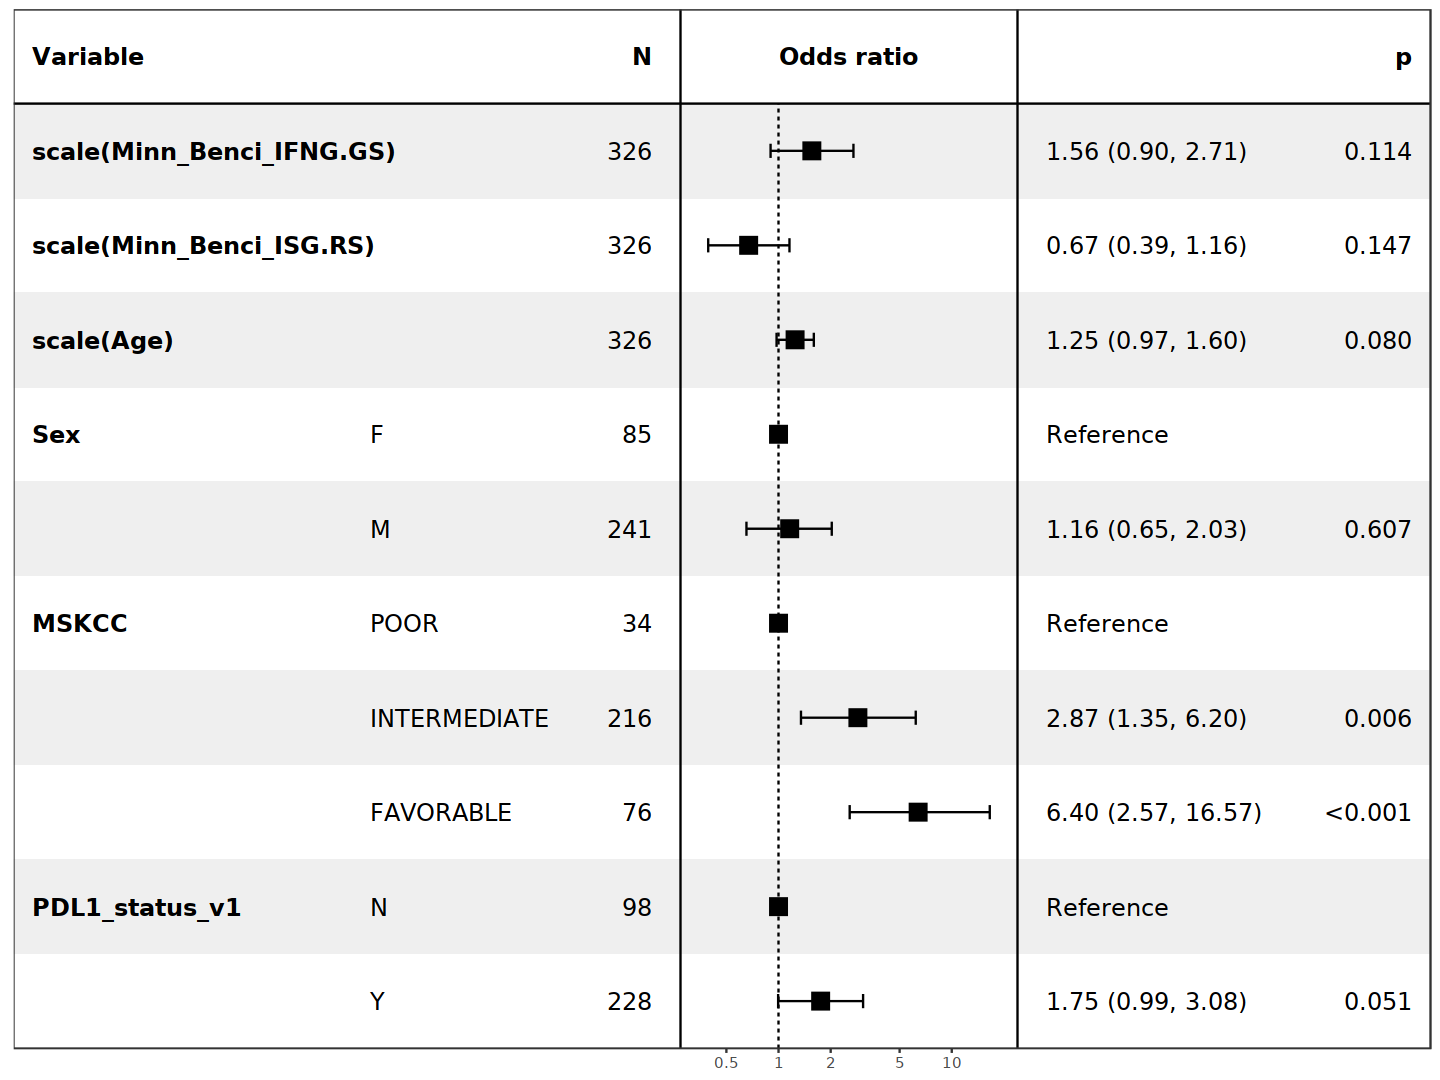

In [41]:
options(repr.plot.width=10.5, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

options(repr.plot.width=12, repr.plot.height=9)
res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(Minn_Benci_IFNG.GS) + scale(Minn_Benci_ISG.RS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
#forest_model(res.cox,panels,recalculate_width = F)

jav101_lr_plot = forest_model(mylogit,panels,recalculate_width = F)
jav101_lr_plot

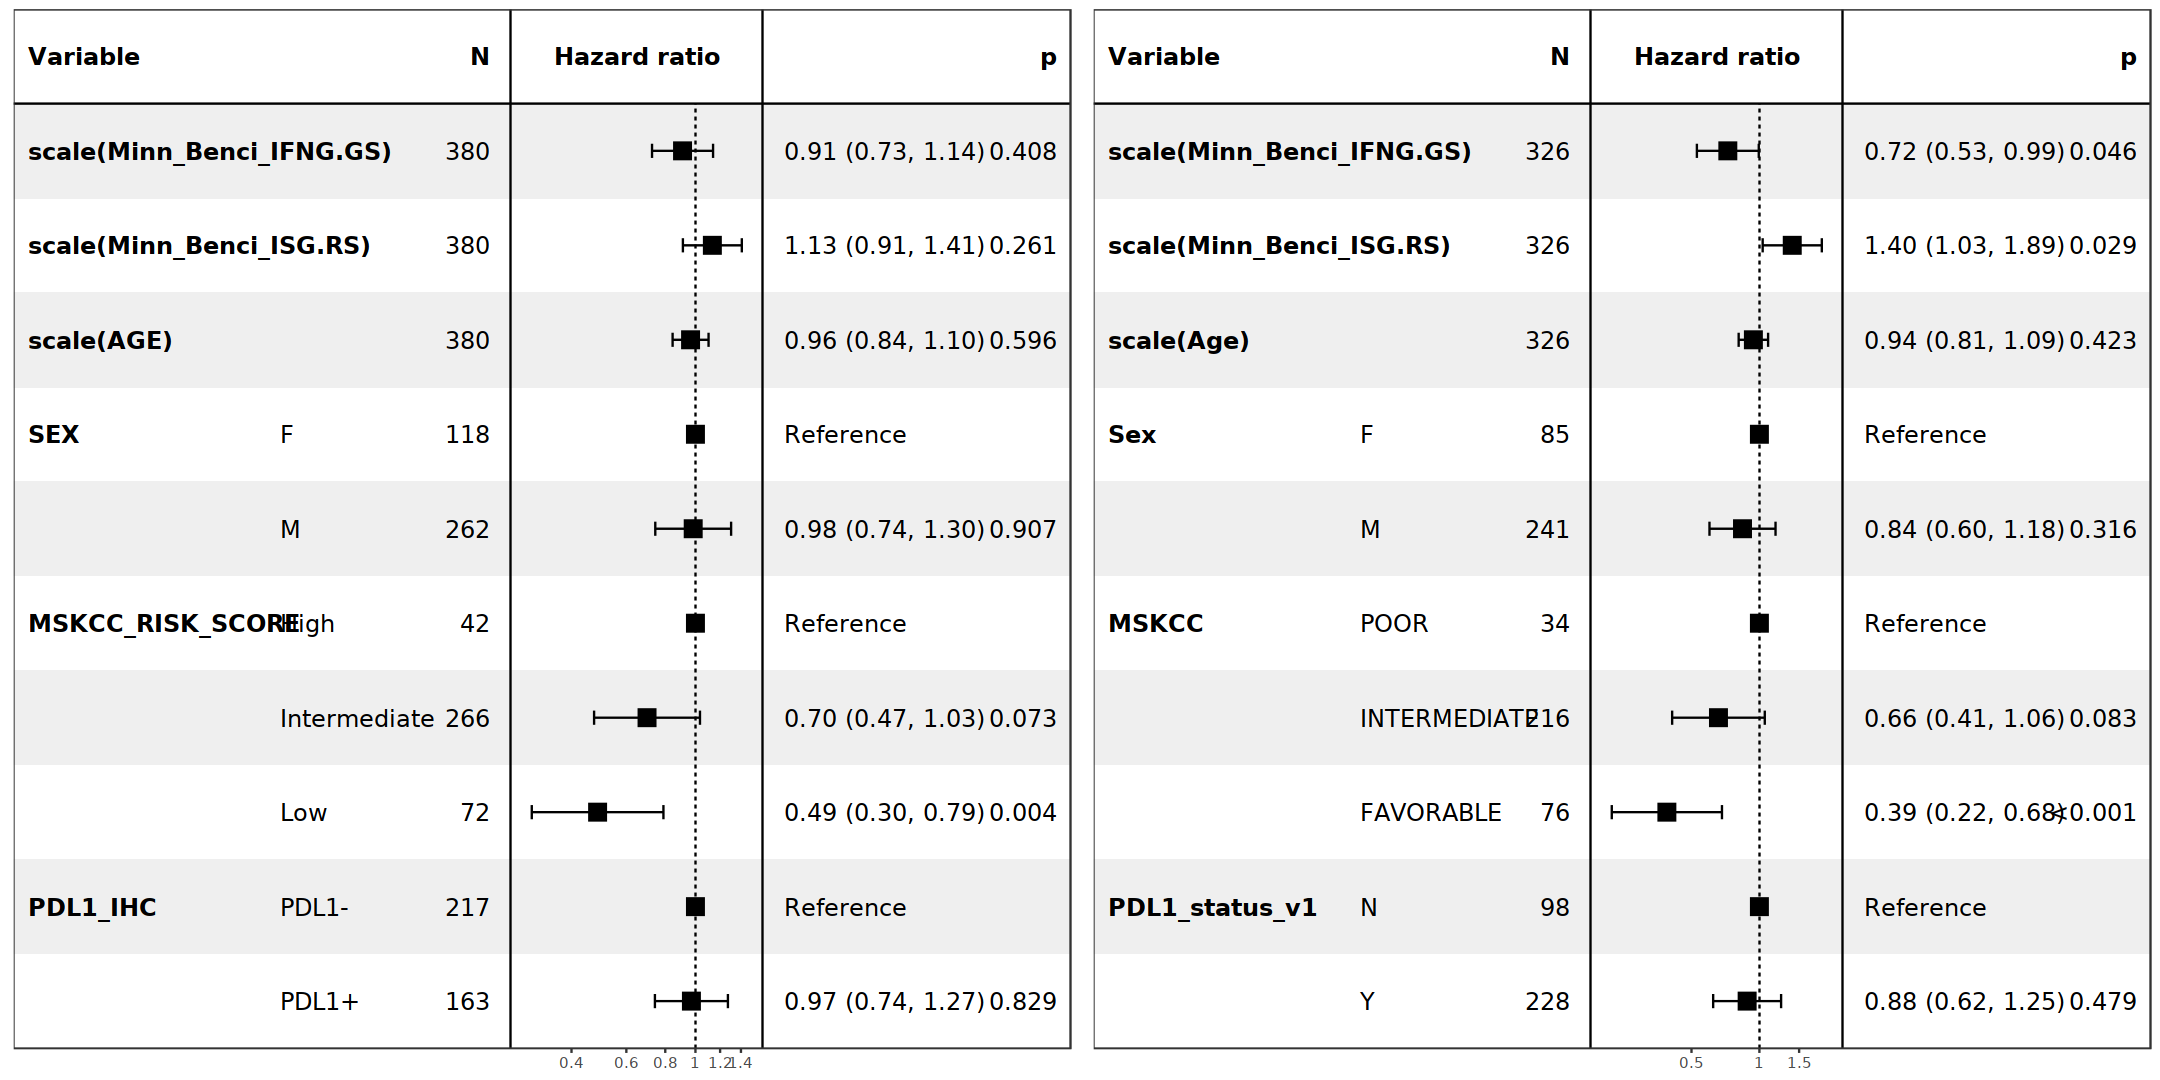

In [42]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_cox_plot, jav101_cox_plot)

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS2C_S2D_RS_GS_IMM151_JAV101_Cox_PH.pdf",width = 18, height = 9)

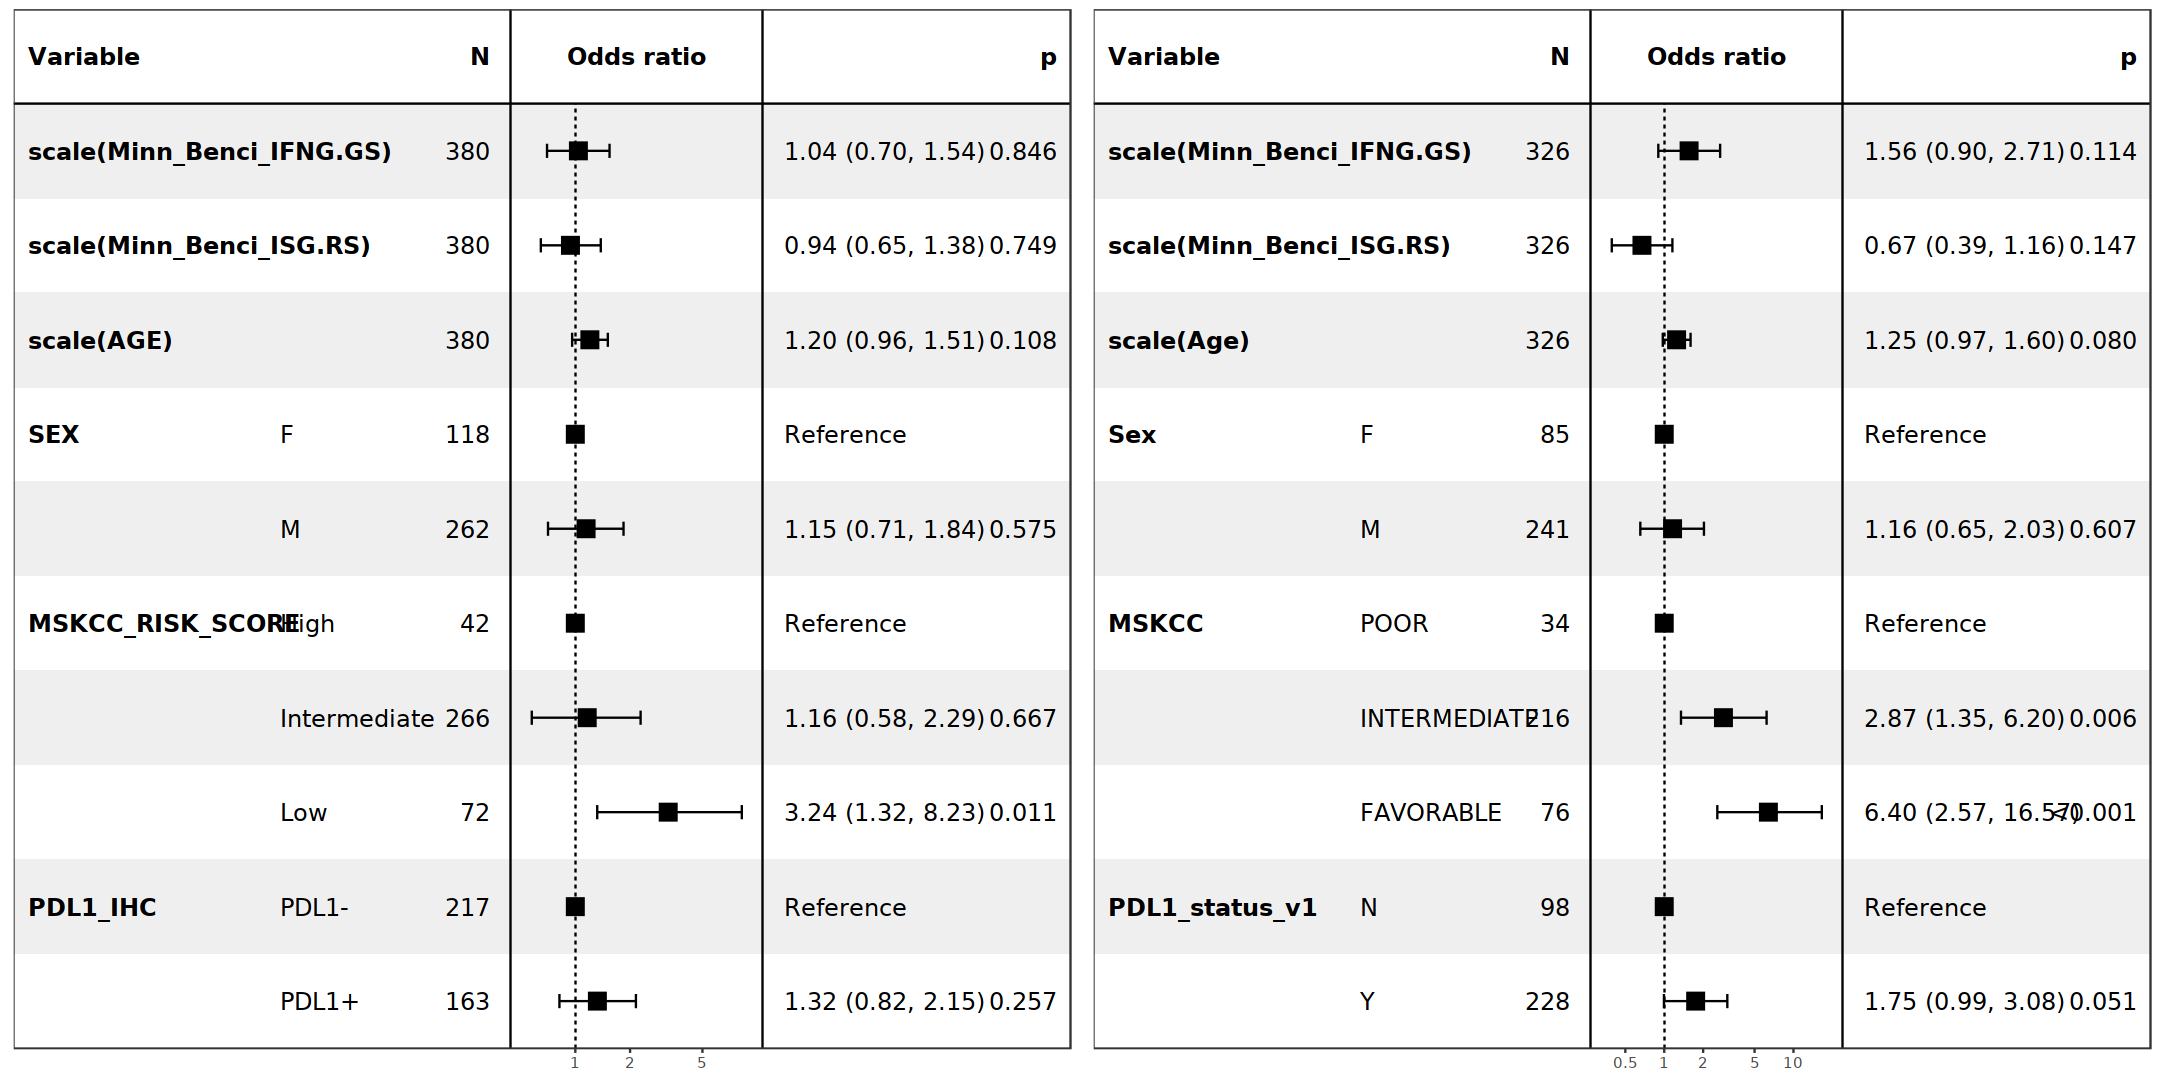

In [43]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_lr_plot, jav101_lr_plot)

ggsave("../../Supp_Figures_Final/Figure_S1_S2/FigureS2E_S2F_RS_GS_IMM151_JAV101_LR.pdf",width = 18, height = 9)

In [44]:
print(sessionInfo())
print(version)

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /usr/lib64/libblas.so.3.4.2
LAPACK: /broad/software/free/Linux/redhat_7_x86_64/pkgs/r_4.1.0/lib64/R/lib/libRlapack.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] car_3.1-1           carData_3.0-5       pROC_1.17.0.1      
 [4] scales_1.3.0        forestmodel_0.6.2   forcats_0.5.2      
 [7] purrr_0.3.5         readr_2.0.0         tidyr_1.2.1        
[10] tibble_3.1.8        tidyverse_1.3.1     survminer_0.4.9.999
[13] survival_3.2-11     hrbrthemes_0.8.0    cowplot_1.1.1      
[16] Scillus_0.5.0       lmerTest_3.1-3      lme4_1.1-31        
[19] Matrix_1.5-1        ggrepel_0.9.2       RColorBrewer_1.1-3 
[22] glue_1.7.0          ggpubr_0.4.0        dplyr_1.0.10       
[25] useful_1.2.6        ggplot2_3.3.6       sp_1.5-0        